## 라이브러리, 파일 불러오기

- 운영체제 : window 64 bit
- 언어 : Python
- 라이브러리 버전
>Python - 3.8.3 <br>
pandas - 1.0.5 <br>
numpy - 1.23.5 <br>
matplotlib - 3.2.2 <br>
seaborn - 0.10.1 <br>
scipy - 1.5.0 <br>
sklearn - 0.23.2 <br>
pycaret -  <br>
optuna - 3.0.3 <br>
shap - 0.41.0 <br>
catboost - 1.1.1 <br>
lightgbm - 3.3.3 <br>
xgboost - 1.7.1 <br>
statsmodels - 0.13.5 <br>
pycaret - 2.3.10 <br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, mean_squared_error, mean_absolute_error

# Teacher 모델
from pycaret.classification import *

# Student 모델
import optuna  # 파라미터 튜닝
import shap  # SHAP value
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

from statsmodels.formula.api import ols

In [5]:
# 데이터 불러오기
train = pd.read_csv('C:/Users/cdbre/OneDrive/바탕 화면/데이콘용/train.csv')
test = pd.read_csv('C:/Users/cdbre/OneDrive/바탕 화면/데이콘용/test.csv')

## EDA

### Train data

In [6]:
train.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,0,3059,0.0,0,13,78,NaN,NaN,NaN,NaN,NaN,NaN,888,NaN,0.0,27.0,1,14,16,1,16,6,1951,0,8504,21370,0,427,2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,0,2978,0.0,0,0,31,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,NaN,0,1,0,0,1,0,572,2,19,1117,0,0,0,NaN,0,0.0,0.0,1.0,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,0,17,0.0,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,0.0,0.0,0,0,0,0,2,0,328,0,17,1334,0,0,1,NaN,0,0.0,0.0,0.0,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,0,1960,0.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,0.0,NaN,0,4,1,0,0,0,906,1,44,21774,2,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,0,71,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,0.0,0.0,0,0,0,0,2,0,309,0,217,18470,0,2,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [7]:
train.shape

(14095, 54)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [9]:
# 결측치 확인
df1 = pd.DataFrame(train.isna().sum().sort_values(ascending=False), columns = ['count'])
df2 = pd.DataFrame((train.isna().sum() / len(train)).sort_values(ascending=False), columns = ['rate'])
df_mv = pd.concat([df1, df2], axis=1)
df_mv[df_mv['count'] > 0]  # 결측치가 최소 1개 있는 칼럼

,count,rate
U4,11977,0.849734
U6,11977,0.849734
U14,11977,0.849734
U75,11779,0.835686
U20,11779,0.835686
U25,11779,0.835686
U50,11779,0.835686
U100,11779,0.835686
V100,10371,0.735793
SOOTPERCENTAGE,10205,0.724016


In [10]:
# 0과 1의 분포 확인
print(train.Y_LABEL.value_counts(), '\n')
print(f'오일 이상 {round(train[train.Y_LABEL == 1].shape[0] / train.shape[0],3)*100} %')

0    12892
1     1203
Name: Y_LABEL, dtype: int64 

오일 이상 8.5 %


In [11]:
pd.DataFrame(train.Y_LABEL.value_counts())

,Y_LABEL
0,12892
1,1203


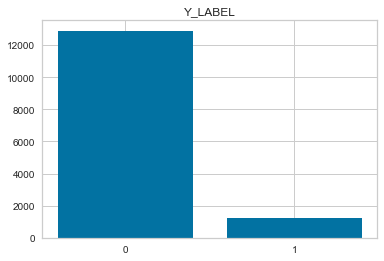

In [12]:
# 타겟 데이터(Y_LABEL) 분포
plt.figure(figsize=(6,4))
plt.title('Y_LABEL')
plt.bar(train.Y_LABEL.value_counts().index, train.Y_LABEL.value_counts().values)
plt.xticks([0,1])
plt.show()

### 상관관계

#### 전체 변수간 상관관계

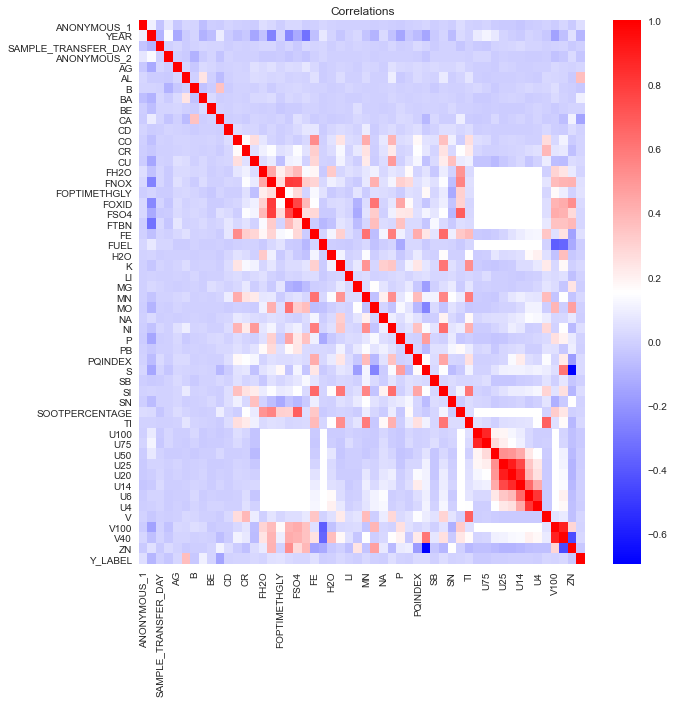

In [13]:
# 전체 변수간 상관관계
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), cmap='bwr')
plt.title('Correlations')
plt.show()

In [14]:
train_corr = train.drop(train[['ID','COMPONENT_ARBITRARY','YEAR']], axis=1)
train_corr = train_corr.astype({'Y_LABEL' : 'int'})
corr = train_corr.corr(method='pearson')

correlation = corr.unstack()
train_temp = pd.DataFrame(correlation['Y_LABEL'].sort_values(ascending=False), columns=['Y_LABEL'])
train_temp.style.background_gradient(cmap='viridis')

,Y_LABEL
Y_LABEL,1.000000
AL,0.370512
BA,0.104840
FOPTIMETHGLY,0.055908
FNOX,0.053337
FE,0.047992
NI,0.046806
ANONYMOUS_1,0.044197
SI,0.036731
FOXID,0.032596


#### FH2O, FNOX, FOPTIMETHGLY, FOXID, FSO4, FTBN, FE, Y_LABEL 상관관계

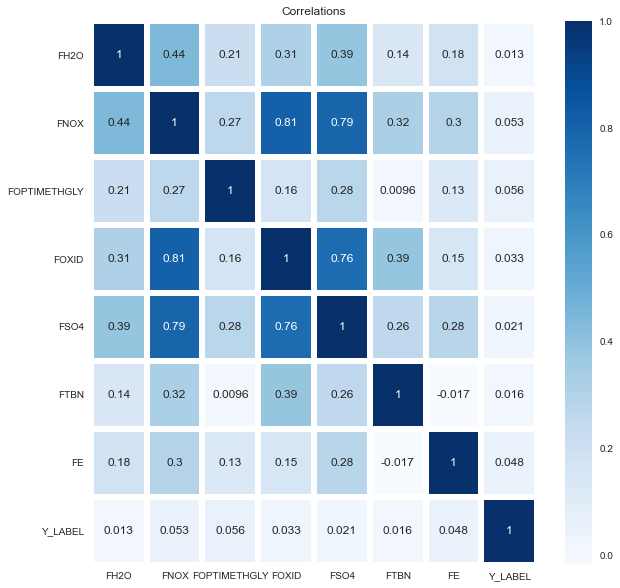

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(train[['FH2O','FNOX','FOPTIMETHGLY','FOXID','FSO4','FTBN','FE','Y_LABEL']].corr(), 
            cmap='Blues',  # 색 지정
            annot=True,  # 값 표시
            linewidth = 5
           )
plt.title('Correlations')
plt.show()

**FNOX**(NOx 수치 By FT-IR)와 **FOXID**(Oxidation 수치 by FT-IR) 상관계수 : ***0.81*** <br>
**FNOX**(NOx 수치 By FT-IR)와 **FSO4**(SO4 수치 by FT-IR) 상관계수 : ***0.79*** <br>
**FOXID**(Oxidation 수치 by FT-IR)와 **FSO4**(SO4 수치 by FT-IR) 상관계수 : ***0.76*** <br>

<Figure size 720x720 with 0 Axes>

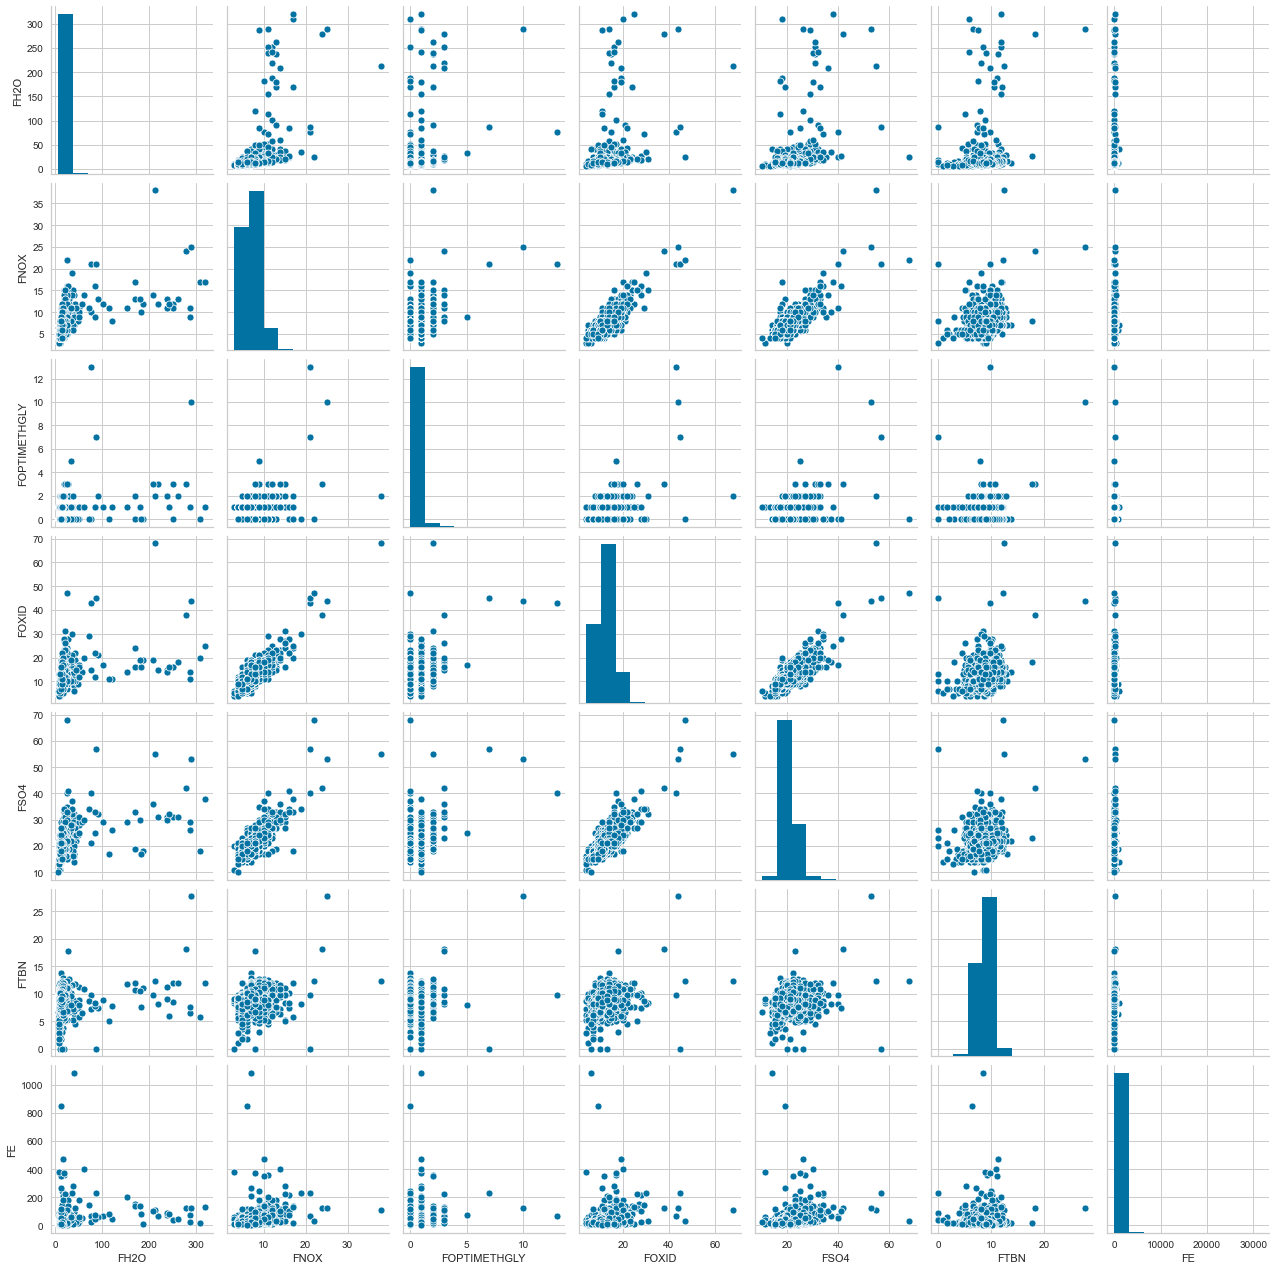

In [16]:
# Pairplot
plt.figure(figsize=(10,10))
sns.pairplot(train[['FH2O','FNOX','FOPTIMETHGLY','FOXID','FSO4','FTBN','FE']])
plt.show()

FNOX, FOXID, FSO4가 선형관계인 것을 확인했다

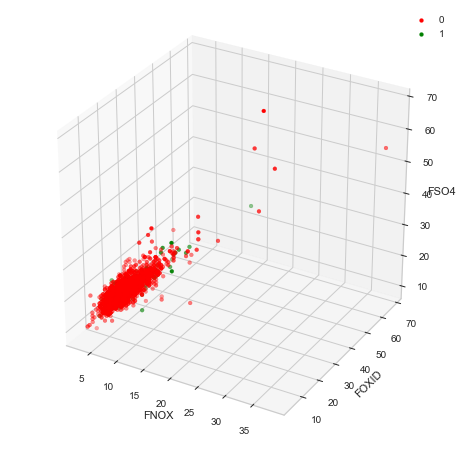

In [17]:
# 3D로 FNOX, FOXID, FSO4 관계 확인(오일 정상, 이상별)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(train[train.Y_LABEL == 0].FNOX, train[train.Y_LABEL == 0].FOXID, train[train.Y_LABEL == 0].FSO4, 
           marker='o', s=15, color='red', label='0')
ax.scatter(train[train.Y_LABEL == 1].FNOX, train[train.Y_LABEL == 1].FOXID, train[train.Y_LABEL == 1].FSO4, 
           marker='o', s=15, color='green', label='1')

ax.set_xlabel('FNOX')
ax.set_ylabel('FOXID')
ax.set_zlabel('FSO4')

plt.legend()
plt.show()

#### 입자 크기 상관관계 (U100, U75, U50, U25, U20, U14, U6, U4, V, Y_LABEL)

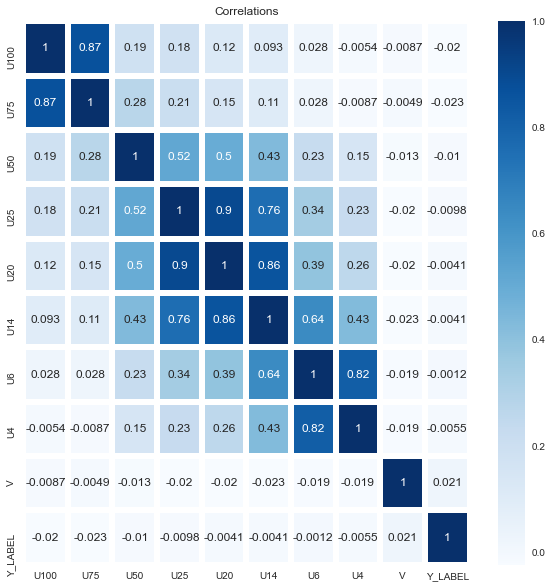

In [18]:
# Particle Count 변수간 상관관계
plt.figure(figsize=(10,10))
sns.heatmap(train[['U100','U75','U50','U25','U20','U14','U6','U4','V','Y_LABEL']].corr(), 
            cmap='Blues', 
            annot=True,
            linewidth = 5
           )
plt.title('Correlations')
plt.show()

U75와 U100의 상관계수 : ***0.87*** <br>

U25와 U20의 상관계수 : ***0.9*** <br>
U14와 U20의 상관계수 : ***0.86*** <br>
U25와 U14의 상관계수 : ***0.76*** <br>

U6과 U4의 상관계수 : ***0.82*** <br>

> (U4, U6), (U14, U20, U25), (U50), (U75, U100) 끼리 상관관계가 있다

<Figure size 720x720 with 0 Axes>

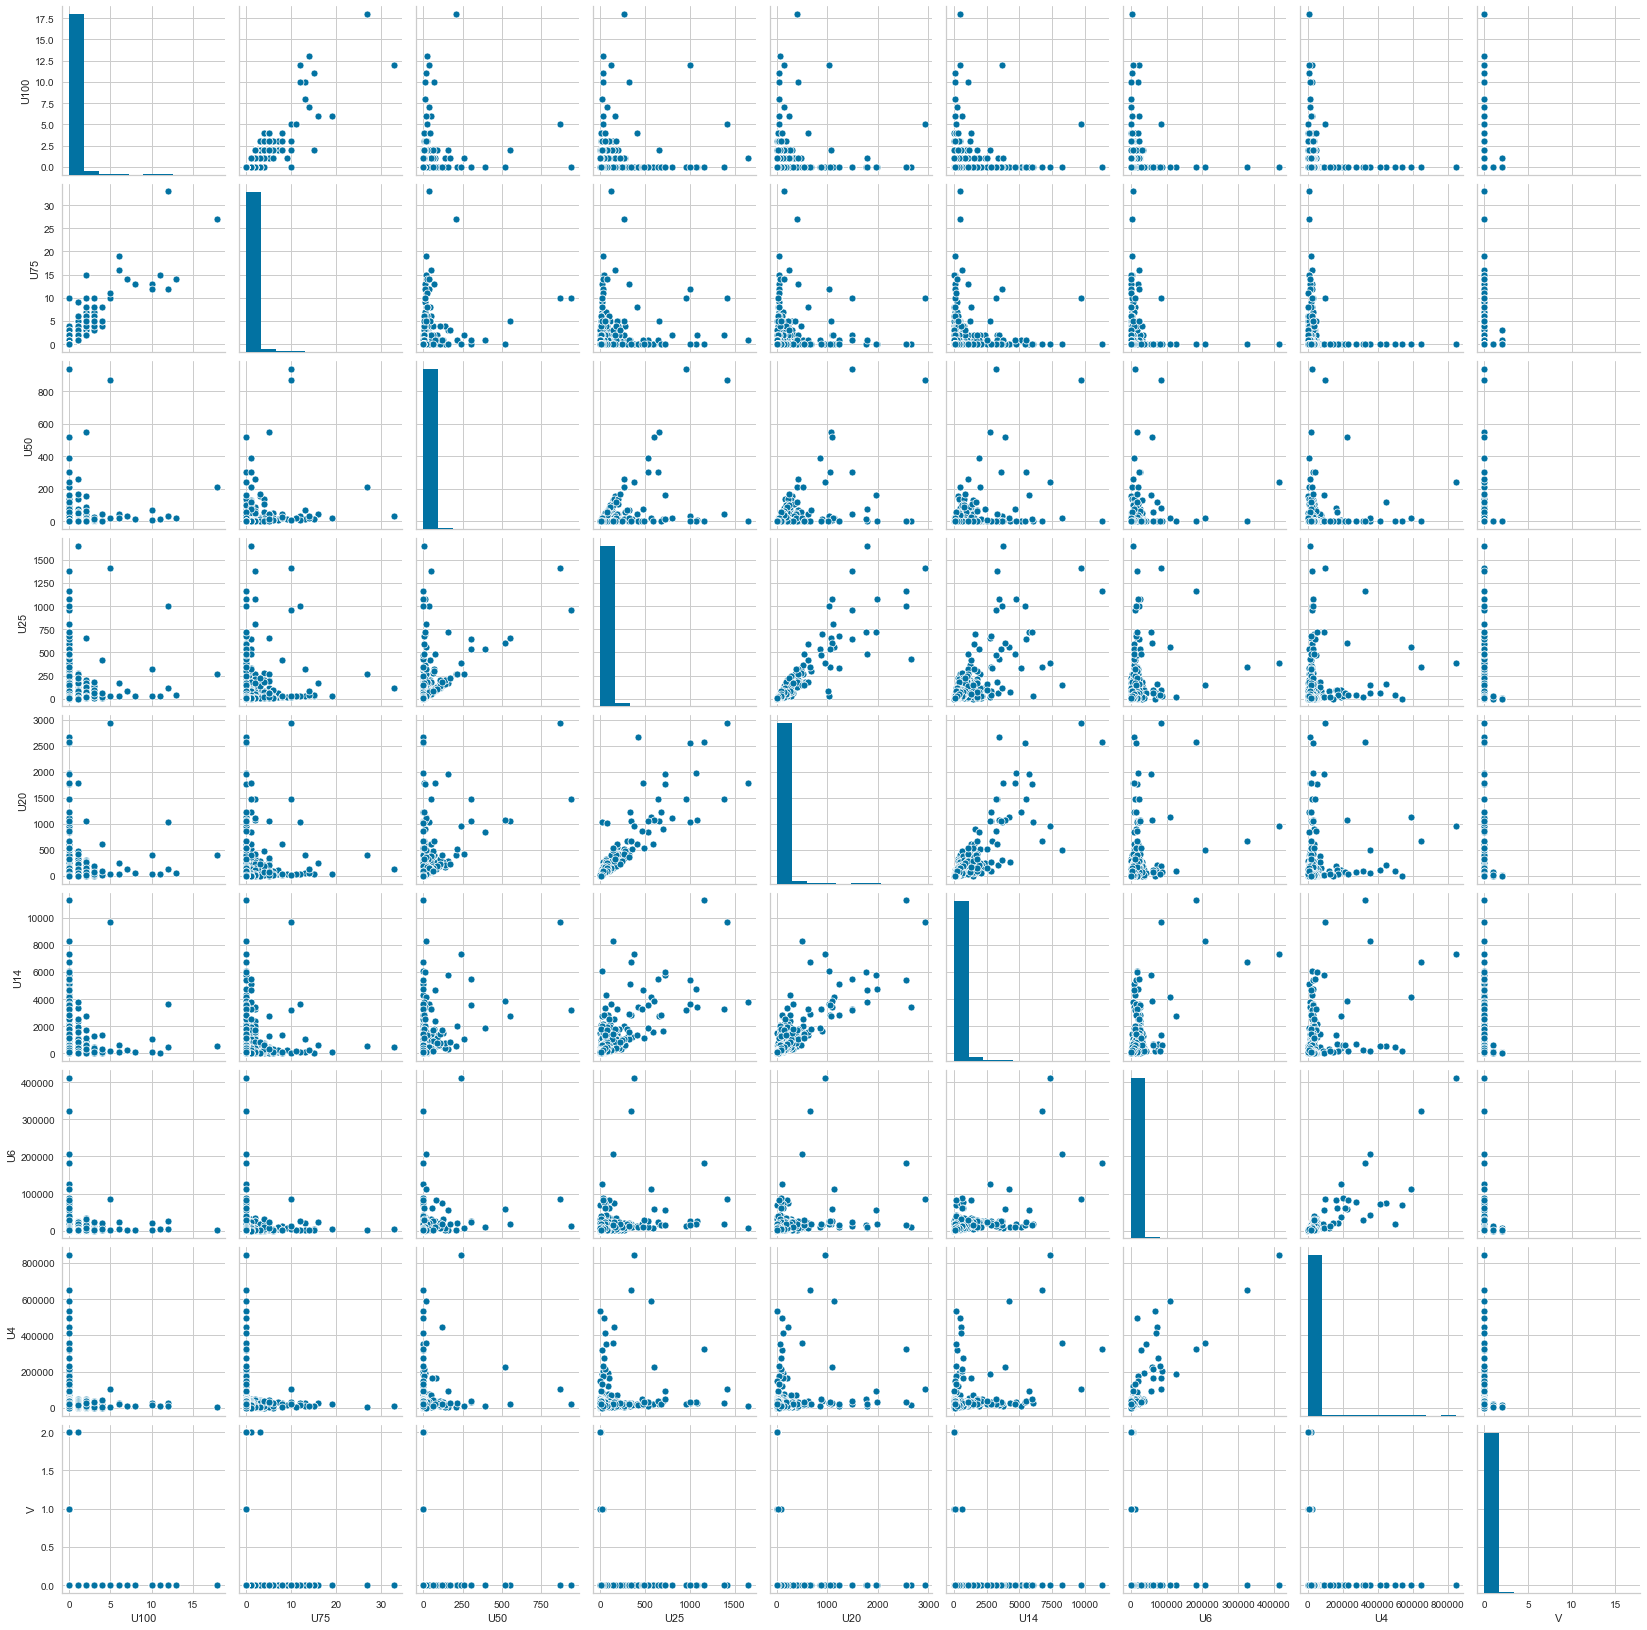

In [19]:
# Pairplot
plt.figure(figsize=(10,10))
sns.pairplot(train[['U100','U75','U50','U25','U20','U14','U6','U4','V']])
plt.show()

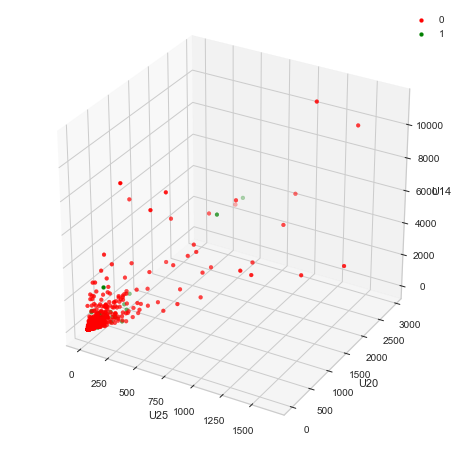

In [20]:
# 중간 크기 입자 U14, U20, U25를 3D로 표현 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(train[train.Y_LABEL == 0].U25, train[train.Y_LABEL == 0].U20, train[train.Y_LABEL == 0].U14, 
           marker='o', s=15, color='red', label='0')
ax.scatter(train[train.Y_LABEL == 1].U25, train[train.Y_LABEL == 1].U20, train[train.Y_LABEL == 1].U14, 
           marker='o', s=15, color='green', label='1')
ax.set_xlabel('U25')
ax.set_ylabel('U20')
ax.set_zlabel('U14')

plt.legend()
plt.show()

In [21]:
# 입자 크기 U75, U100 분포 확인
train[train.U75.notnull()][['U75','U100']].head()

,U75,U100
1,0.0,0.0
2,0.0,0.0
15,0.0,0.0
16,1.0,0.0
27,0.0,0.0


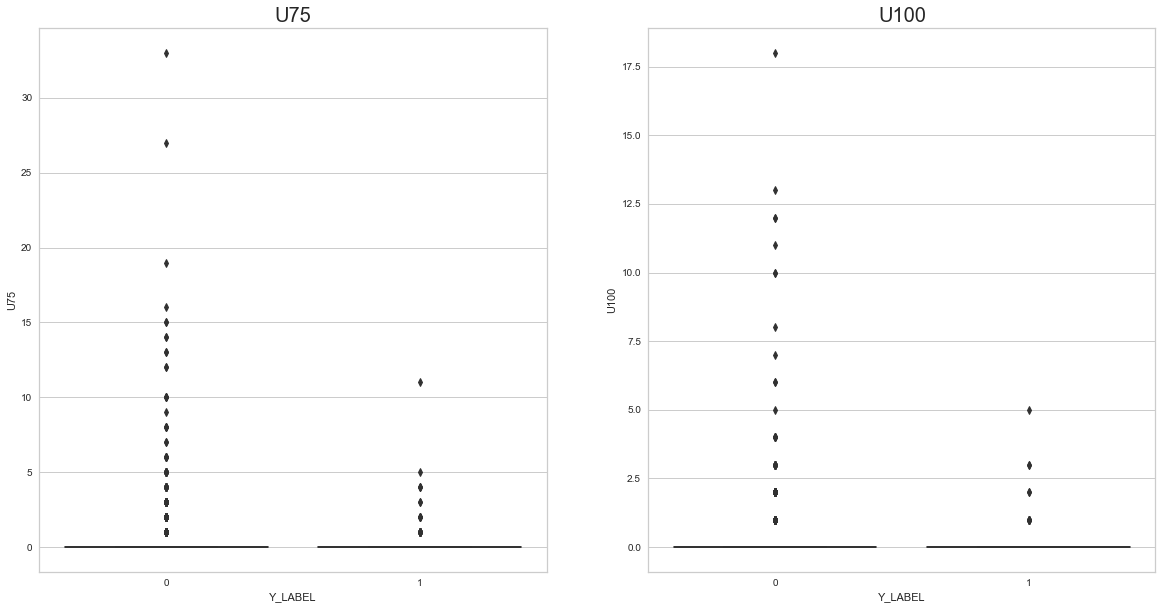

In [22]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('U75', fontsize=20)
sns.boxplot(x='Y_LABEL', y='U75', data=train[(train.U75.notnull())])

plt.subplot(122)
plt.title('U100', fontsize=20)
sns.boxplot(x='Y_LABEL', y='U100', data=train[(train.U75.notnull())])

plt.show()

In [23]:
train[(train.U75.notnull())].U75.describe()

count    2316.000000
mean        0.417098
std         1.626333
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        33.000000
Name: U75, dtype: float64

In [24]:
train[(train.U75.notnull())].U100.describe()

count    2316.000000
mean        0.173575
std         0.878892
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.000000
Name: U100, dtype: float64

입자 크기가 큰 U75, U100의 경우 대부분의 값이 0이다

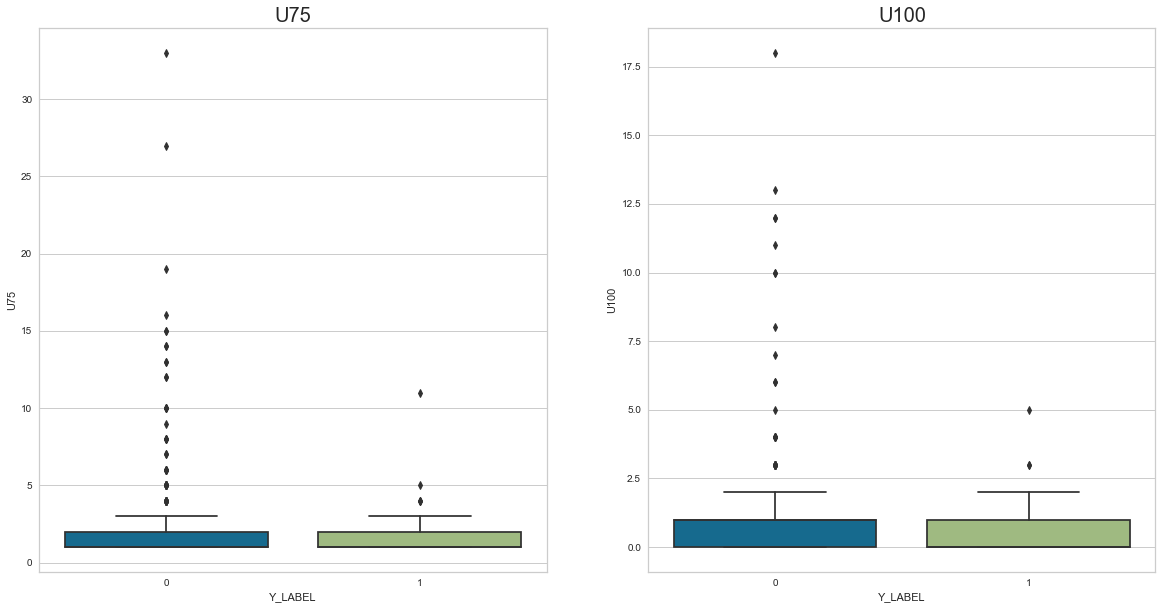

In [25]:
# U75가 0이 아닌 경우
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('U75', fontsize=20)
sns.boxplot(x='Y_LABEL', y='U75', data=train[(train.U75.notnull()) & (train.U75 != 0)])

plt.subplot(122)
plt.title('U100', fontsize=20)
sns.boxplot(x='Y_LABEL', y='U100', data=train[(train.U75.notnull()) & (train.U75 != 0)])

plt.show()

#### V, V100, V40, ZN, Y_LABEL 상관관계

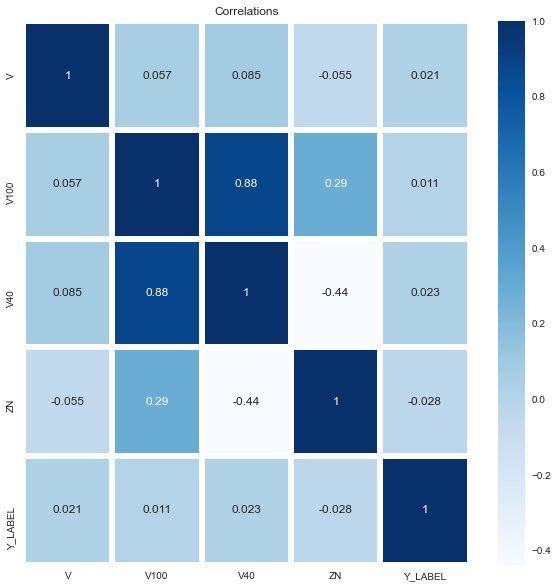

In [26]:
# Viscosity 변수간 상관관계
plt.figure(figsize=(10,10))
sns.heatmap(train[['V','V100','V40','ZN','Y_LABEL']].corr(), 
            cmap='Blues', 
            annot=True,
            linewidth = 5
           )
plt.title('Correlations')
plt.show()

**V40**과 **V100**의 상관계수가 ***0.88***로 다소 높은 상관관계가 있음을 알 수 있다

<Figure size 720x720 with 0 Axes>

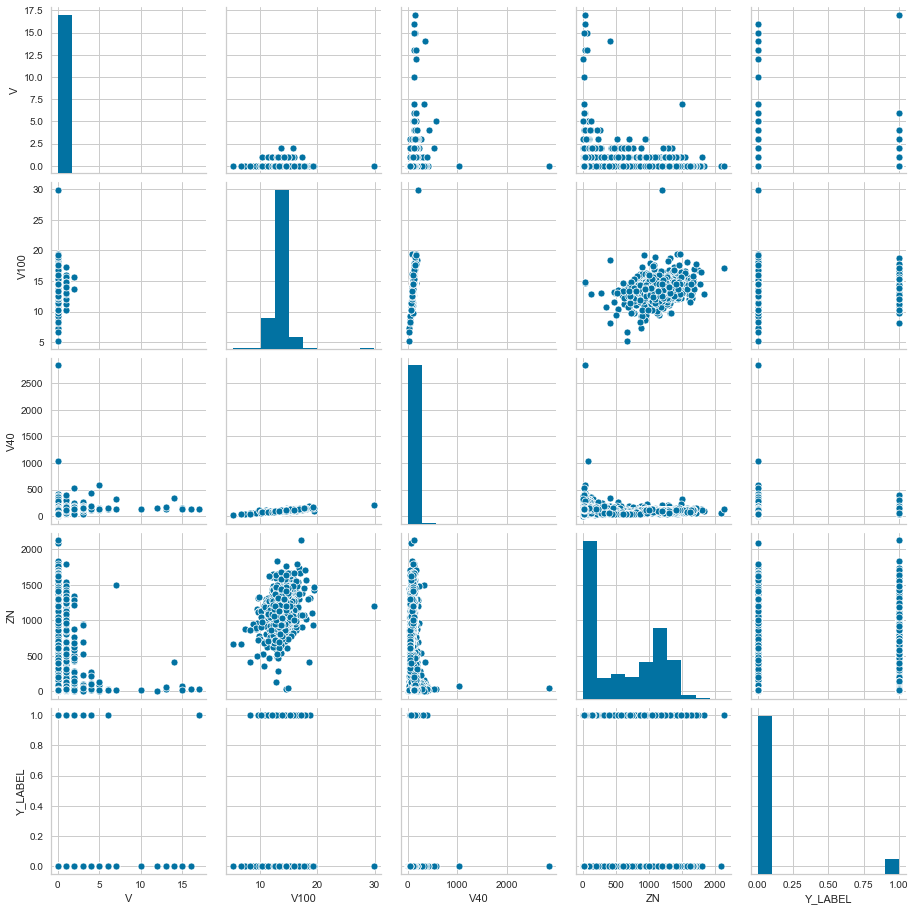

In [27]:
# Pairplot
plt.figure(figsize=(10,10))
sns.pairplot(train[['V','V100','V40','ZN','Y_LABEL']])
plt.show()

Plot을 통해 V40과 V100의 선형관계 확인, 상관관계도 0.88로 높은 것을 확인할 수 있다.

### 부품별 특징 (COMPONENT_ARBITRARY)

**COMPONENT_ARBITRARY(샘플 오일 관련 부품) 칼럼**

In [28]:
df_ca = pd.concat([pd.DataFrame(train['COMPONENT_ARBITRARY'].value_counts()),
                   pd.DataFrame(train['COMPONENT_ARBITRARY'].value_counts() / train['COMPONENT_ARBITRARY'].value_counts().sum()),
                   pd.DataFrame(test['COMPONENT_ARBITRARY'].value_counts()),
                   pd.DataFrame(test['COMPONENT_ARBITRARY'].value_counts() / test['COMPONENT_ARBITRARY'].value_counts().sum())],
                  axis=1)

df_ca.columns = ['train','train_rate','test','test_rate']  # 칼럼명 설정
df_ca.train_rate = round(df_ca.train_rate, 2)
df_ca.test_rate = round(df_ca.test_rate, 2)

# Index 순서 맞춰주기
label = ['COMPONENT1','COMPONENT2','COMPONENT3','COMPONENT4']
df_ca = df_ca.loc[label]

df_ca

,train,train_rate,test,test_rate
COMPONENT1,3890,0.28,1667,0.28
COMPONENT2,2316,0.16,993,0.16
COMPONENT3,7050,0.50,3021,0.50
COMPONENT4,839,0.06,360,0.06


train과 test에서 부품별 비율은 동일하다

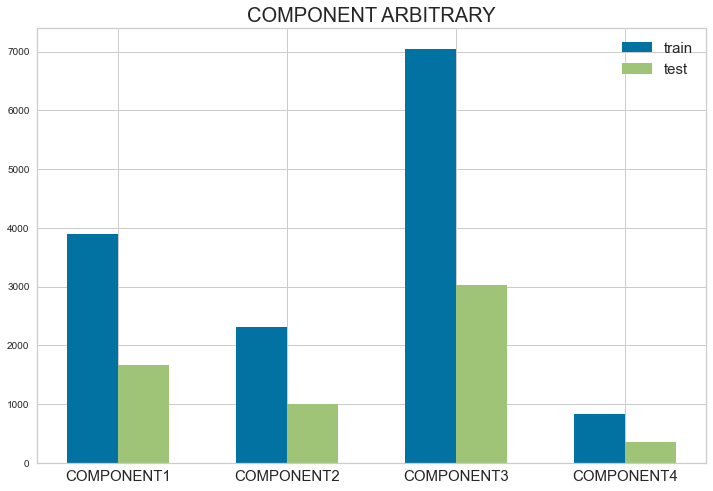

In [29]:
# COMPONENT ARBITRARY 개수
plt.figure(figsize=(12,8))
plt.title('COMPONENT ARBITRARY', fontsize=20)

idx = np.arange(4)
w = 0.3

plt.bar(idx-0.15, df_ca.train, width=0.3, label='train')
plt.bar(idx+0.15, df_ca.test, width=0.3, label='test')

plt.xticks(idx, df_ca.index, fontsize=15)
plt.legend(fontsize=15)
plt.show()

COMPONENT1, COMPONENT2, COMPONENT3, COMPONENT4 총 4가지 존재 <br>

각 COMPONENT 별로 이상 여부 확인

#### 1) COMPONENT1

In [30]:
train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT1') & (train['Y_LABEL'] == 0)].head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
9,TRAIN_00009,COMPONENT1,6748,2015,6,200,0,1,1,0,0,62,0.0,0,0,2,9.0,5.0,0.0,9.0,18.0,8.9,12,0.0,0.0,NaN,0,13,0,3,6,0,1047,5,5,4191,0,3,2,0.2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,13.4,98.9,1020,0
10,TRAIN_00010,COMPONENT1,1959,2008,5,200,0,1,6,2,0,8,NaN,0,3,38,12.0,8.0,0.0,14.0,20.0,9.8,41,0.0,0.0,18.0,0,23,1,56,7,0,960,2,25,5144,2,12,4,0.9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,13.1,97.6,1171,0
20,TRAIN_00020,COMPONENT1,2080,2010,5,200,0,0,30,0,0,32,0.0,0,0,2,14.0,8.0,0.0,17.0,20.0,10.3,6,0.0,0.0,2.0,0,9,0,197,0,0,891,2,10,4047,0,6,2,0.1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,13.8,111.5,1003,0
25,TRAIN_00025,COMPONENT1,2043,2011,8,1243,0,0,6,0,0,79,0.0,0,1,40,15.0,7.0,0.0,12.0,17.0,8.2,21,0.0,0.0,6.0,0,9,1,24,4,0,878,3,13,4034,2,8,3,0.2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11.9,83.2,1063,0
28,TRAIN_00028,COMPONENT1,4488,2014,4,200,0,0,1,0,0,35,0.0,0,2,0,13.0,7.0,1.0,12.0,18.0,9.0,13,0.0,0.0,1.0,0,307,0,0,2,0,1332,1,8,7607,0,5,0,0.4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,13.8,99.3,1507,0


In [31]:
train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT1') & (train['Y_LABEL'] == 1)].head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
24,TRAIN_00024,COMPONENT1,1991,2008,7,200,0,26,32,3,0,60,NaN,0,2,2,14.0,7.0,1.0,15.0,20.0,9.8,12,0.0,0.0,6.0,0,14,1,214,1,0,1047,2,17,4342,1,9,2,0.2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,13.5,109.2,1250,1
77,TRAIN_00077,COMPONENT1,1662,2010,8,862,0,3,77,0,0,2347,0.0,0,1,8,14.0,6.0,0.0,11.0,19.0,10.2,42,0.0,0.0,3.0,0,505,2,176,4,0,900,4,13,3352,0,15,3,0.4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14.9,125.9,1055,1
88,TRAIN_00088,COMPONENT1,4086,2011,5,200,0,1453,160,11,0,214,0.0,0,0,2,16.0,8.0,1.0,16.0,20.0,10.6,7,0.0,0.0,3.0,0,15,0,271,4,0,1212,2,8,4507,0,7,3,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,13.8,111.0,1515,1
185,TRAIN_00185,COMPONENT1,1709,2008,19,550,1,6,1,6,0,2,0.0,0,1,1,11.0,7.0,1.0,7.0,18.0,9.1,23,0.0,0.0,NaN,1,7,1,102,1,0,793,8,12,6726,2,7,0,1.1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,111.0,900,1
228,TRAIN_00228,COMPONENT1,1000,2010,4,200,0,7,9,0,0,398,0.0,0,15,19,24.0,14.0,1.0,21.0,32.0,7.2,114,0.0,0.0,8.0,0,218,2,94,4,1,1135,30,16,7015,0,32,2,2.4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16.7,136.9,1353,1


In [32]:
print('COMPONENT1 전체 :', train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT1')].shape)
print('COMPONENT1 정상 :',train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT1') & (train['Y_LABEL'] == 0)].shape)
print('COMPONENT1 이상 :',train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT1') & (train['Y_LABEL'] == 1)].shape)

COMPONENT1 전체 : (3890, 54)
COMPONENT1 정상 : (3578, 54)
COMPONENT1 이상 : (312, 54)


In [33]:
# COMPONENT1의 결측치 확인
df1 = pd.DataFrame(train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT1')].isna().sum().sort_values(ascending=False), 
                   columns=['Missing_Value'])
df1[df1.Missing_Value > 0]

,Missing_Value
U50,3890
U20,3890
U100,3890
U75,3890
U25,3890
U4,3890
U6,3890
U14,3890
CD,648
K,328


In [34]:
# 전부 결측치인 칼럼
c1_nan = df1[df1.Missing_Value == len(train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT1')])].index.tolist()
print(c1_nan)

['U50', 'U20', 'U100', 'U75', 'U25', 'U4', 'U6', 'U14']


**>> COMPONENT1의 경우 Particle Count(입자 수)가 전부 결측치**

In [35]:
# COMPONENT1의 0과 1의 분포 확인
df1 = pd.DataFrame(train[train['COMPONENT_ARBITRARY'] == 'COMPONENT1'].Y_LABEL.value_counts())
df1

,Y_LABEL
0,3578
1,312


In [36]:
# 이상 비율
round(df1.loc[1,'Y_LABEL'] / df1.sum(),3)

Y_LABEL    0.08
dtype: float64

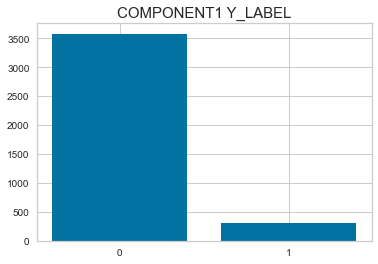

In [37]:
plt.figure(figsize=(6,4))
plt.title('COMPONENT1 Y_LABEL', fontsize=15)
plt.bar(df1.index, df1['Y_LABEL'])
plt.xticks([0,1])
plt.show()

#### 2) COMPONENT2

In [38]:
train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT2') & (train['Y_LABEL'] == 1)].head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,0,17,0.0,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,0.0,0.0,0,0,0,0,2,0,328,0,17,1334,0,0,1,NaN,0,0.0,0.0,0.0,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
59,TRAIN_00059,COMPONENT2,8483,2018,2,7550,0,0,3,0,0,37,0.0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,0.0,0,0,0,0,0,0,278,0,9,3084,0,3,0,NaN,0,0.0,0.0,3.0,3.0,5.0,19.0,428.0,1304.0,0,NaN,58.1,382,1
333,TRAIN_00333,COMPONENT2,4486,2007,4,200,0,3,3,7,1,30,NaN,0,1,171,NaN,NaN,NaN,NaN,NaN,NaN,63,NaN,0.0,1.0,0,2,1,0,1,0,453,1,29,1977,1,1,0,NaN,0,0.0,0.0,0.0,1.0,2.0,NaN,NaN,NaN,0,NaN,45.7,500,1
371,TRAIN_00371,COMPONENT2,8009,2009,3,200,0,164,2,2,0,154,NaN,0,0,21,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,0.0,4.0,0,2,0,4,2,0,298,1,16,6329,1,12,0,NaN,0,0.0,0.0,0.0,2.0,6.0,NaN,NaN,NaN,0,NaN,63.9,325,1
597,TRAIN_00597,COMPONENT2,4969,2014,6,200,0,4,0,0,0,45,0.0,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,0,2,0,0,2,0,486,0,7,1720,0,1,0,NaN,0,0.0,0.0,1.0,3.0,4.0,22.0,764.0,3170.0,0,NaN,46.9,586,1


In [39]:
train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT2') & (train['Y_LABEL'] == 0)].head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,0,2978,0.0,0,0,31,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,NaN,0,1,0,0,1,0,572,2,19,1117,0,0,0,NaN,0,0.0,0.0,1.0,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
15,TRAIN_00015,COMPONENT2,1830,2015,13,550,0,1,19,2,0,3174,0.0,0,0,9,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,0.0,0,6,0,0,2,0,363,0,5,5075,0,0,0,NaN,0,0.0,0.0,2.0,2.0,4.0,13.0,274.0,1181.0,0,NaN,54.4,441,0
16,TRAIN_00016,COMPONENT2,5694,2009,6,200,0,1,2,0,0,32,NaN,0,1,181,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN,0.0,12.0,0,4,0,0,1,0,472,2,66,1270,2,1,1,NaN,0,0.0,1.0,3.0,72.0,102.0,NaN,NaN,NaN,0,NaN,44.4,522,0
27,TRAIN_00027,COMPONENT2,1706,2012,7,200,0,2,10,0,0,127,0.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,0.0,1.0,0,3,0,0,1,0,284,2,18,1582,0,4,0,NaN,0,0.0,0.0,44.0,62.0,134.0,478.0,9765.0,24308.0,0,NaN,45.8,428,0
34,TRAIN_00034,COMPONENT2,1175,2007,2,375,0,8,6,4,0,2647,NaN,0,1,134,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,0.0,4.0,0,448,0,0,2,0,934,2,14,7223,0,8,0,NaN,0,0.0,0.0,0.0,2.0,5.0,46.0,541.0,12543.0,0,NaN,39.5,1057,0


In [40]:
print('COMPONENT2 전체 :', train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT2')].shape)
print('COMPONENT2 정상 :',train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT2') & (train['Y_LABEL'] == 0)].shape)
print('COMPONENT2 이상 :',train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT2') & (train['Y_LABEL'] == 1)].shape)

COMPONENT2 전체 : (2316, 54)
COMPONENT2 정상 : (2110, 54)
COMPONENT2 이상 : (206, 54)


In [41]:
# COMPONENT2의 결측치
df1 = pd.DataFrame(train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT2')].isna().sum().sort_values(ascending=False), 
                   columns=['Missing_Value'])
df1[df1.Missing_Value > 0]

,Missing_Value
FOXID,2316
FUEL,2316
V100,2316
FTBN,2316
FSO4,2316
FOPTIMETHGLY,2316
FNOX,2316
FH2O,2316
SOOTPERCENTAGE,2316
CD,336


In [42]:
c2_nan = df1[df1.Missing_Value == len(train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT2')])].index.tolist()
print(c2_nan)

['FOXID', 'FUEL', 'V100', 'FTBN', 'FSO4', 'FOPTIMETHGLY', 'FNOX', 'FH2O', 'SOOTPERCENTAGE']


**COMPONENT2의 경우 FOXID, FSO4, FOPTIMETHGLY, FNOX, V100, FH2O, FTBN, SOOTPERCENTAGE, FUEL 칼럼이 전부 결측치**

In [43]:
# COMPONENT2의 0과 1의 분포 확인
df1 = pd.DataFrame(train[train['COMPONENT_ARBITRARY'] == 'COMPONENT2'].Y_LABEL.value_counts())
df1

,Y_LABEL
0,2110
1,206


In [44]:
# 이상 비율
round(df1.loc[1,'Y_LABEL'] / df1.sum(),3)

Y_LABEL    0.089
dtype: float64

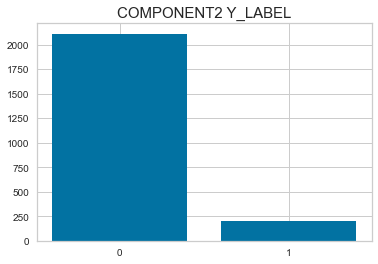

In [45]:
plt.figure(figsize=(6,4))
plt.title('COMPONENT2 Y_LABEL', fontsize=15)
plt.bar(df1.index, df1['Y_LABEL'])
plt.xticks([0,1])
plt.show()

#### 3) COMPONENT3

In [46]:
train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT3') & (train['Y_LABEL'] == 1)].head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
18,TRAIN_00018,COMPONENT3,1000,2017,1,200,0,25,455,0,0,2670,0.0,0,1,4,NaN,NaN,NaN,NaN,NaN,NaN,70,NaN,0.0,1.0,1,2,1,0,11,0,2185,0,56,27460,0,22,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,170.2,125,1
60,TRAIN_00060,COMPONENT3,4817,2012,3,200,0,628,123,6,0,183,0.0,0,2,6,NaN,NaN,NaN,NaN,NaN,NaN,91,NaN,0.0,0.0,0,6,2,5,0,0,1262,0,25,20760,0,2,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,129.9,45,1
67,TRAIN_00067,COMPONENT3,2248,2009,2,200,0,77,2,2,0,73,0.0,0,2,5,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,0.0,1.0,0,0,2,1,0,0,294,0,118,12510,0,4,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,163.2,47,1
124,TRAIN_00124,COMPONENT3,4542,2011,50,550,0,1,7,0,0,733,0.0,0,10,48,NaN,NaN,NaN,NaN,NaN,NaN,468,NaN,0.0,NaN,0,3,8,1,0,2,634,0,173,18567,1,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,140.5,44,1
151,TRAIN_00151,COMPONENT3,9109,2017,2,636,0,19,1,0,0,104,0.0,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN,183,NaN,0.0,2.0,0,0,1,0,0,0,94,0,254,14240,0,16,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,140.7,4,1


In [47]:
train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT3') & (train['Y_LABEL'] == 0)].head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,0,3059,0.0,0,13,78,NaN,NaN,NaN,NaN,NaN,NaN,888,NaN,0.0,27.0,1,14,16,1,16,6,1951,0,8504,21370,0,427,2,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,0,1960,0.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,37,NaN,0.0,NaN,0,4,1,0,0,0,906,1,44,21774,2,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,0,71,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,0.0,0.0,0,0,0,0,2,0,309,0,217,18470,0,2,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0
5,TRAIN_00005,COMPONENT3,2061,2008,4,550,0,3,8,0,0,2770,0.0,0,3,179,NaN,NaN,NaN,NaN,NaN,NaN,550,NaN,0.0,NaN,0,12,42,11,4,4,1129,2,329,8685,2,32,5,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,69.7,1015,0
6,TRAIN_00006,COMPONENT3,1416,2015,7,616,0,0,21,0,0,130,0.0,0,0,3,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,0.0,0.0,0,0,0,0,2,0,330,0,26,16280,0,1,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,148.5,24,0


In [48]:
print('COMPONENT3 전체 :', train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT3')].shape)
print('COMPONENT3 정상 :',train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT3') & (train['Y_LABEL'] == 0)].shape)
print('COMPONENT3 이상 :',train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT3') & (train['Y_LABEL'] == 1)].shape)

COMPONENT3 전체 : (7050, 54)
COMPONENT3 정상 : (6415, 54)
COMPONENT3 이상 : (635, 54)


In [49]:
df1 = pd.DataFrame(train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT3')].isna().sum().sort_values(ascending=False),
                   columns=['Missing_Value'])
df1[df1.Missing_Value > 0]

,Missing_Value
FSO4,7050
U25,7050
FH2O,7050
FOXID,7050
FNOX,7050
SOOTPERCENTAGE,7050
FUEL,7050
U100,7050
U50,7050
U75,7050


In [50]:
c3_nan = df1[df1.Missing_Value == len(train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT3')])].index.tolist()
print(c3_nan)

['FSO4', 'U25', 'FH2O', 'FOXID', 'FNOX', 'SOOTPERCENTAGE', 'FUEL', 'U100', 'U50', 'U75', 'U20', 'U14', 'U6', 'U4', 'FOPTIMETHGLY', 'V100', 'FTBN']


**COMPONENT3의 경우 FUEL, FOPTIMETHGLY, FH2O, FOXID, U100, U75, U50, U25, U20, U14, U6, U4, FSO4, V100, FTBN, SOOTPERCENTAGE, FNOX 칼럼이 전부 결측치**

In [51]:
# COMPONENT3의 0과 1의 분포 확인
df1 = pd.DataFrame(train[train['COMPONENT_ARBITRARY'] == 'COMPONENT3'].Y_LABEL.value_counts())
df1

,Y_LABEL
0,6415
1,635


In [52]:
# 이상치 분포
round(df1.loc[1,'Y_LABEL'] / df1.sum(),3)

Y_LABEL    0.09
dtype: float64

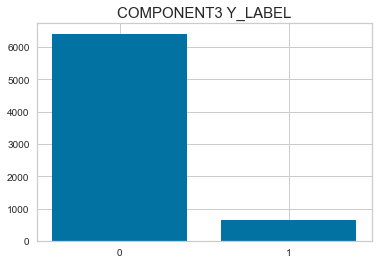

In [53]:
plt.figure(figsize=(6,4))
plt.title('COMPONENT3 Y_LABEL', fontsize=15)
plt.bar(df1.index, df1['Y_LABEL'])
plt.xticks([0,1])
plt.show()

#### 4) COMPONENT4

In [54]:
# 오일 이상
train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT4') & (train['Y_LABEL'] == 1)].head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
93,TRAIN_00093,COMPONENT4,2405,2009,10,200,0,0,146,0,0,29,0.0,0,0,61,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,0.0,4.0,0,9,0,38,7,0,981,0,8,4700,0,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,81.4,1142,1
579,TRAIN_00579,COMPONENT4,4147,2008,5,200,0,1,13,0,0,30,NaN,0,1,295,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,0.0,5.0,0,30,1,52,4,0,1220,2,18,6342,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,72.2,1236,1
746,TRAIN_00746,COMPONENT4,6273,2014,9,200,0,2,5,0,0,2329,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,0.0,2.0,0,135,0,22,2,0,1162,0,8,8424,0,6,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,80.8,1167,1
866,TRAIN_00866,COMPONENT4,5745,2008,5,200,0,13,5,1,0,63,0.0,0,0,63,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,0.0,NaN,0,13,0,210,6,1,1211,1,23,4971,2,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86.8,1281,1
1263,TRAIN_01263,COMPONENT4,1767,2009,13,200,0,0,4,0,0,5,0.0,0,0,18,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,0.0,5.0,0,257,0,112,4,0,719,0,12,5535,0,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,90.7,843,1


In [55]:
# 오일 정상
train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT4') & (train['Y_LABEL'] == 0)].head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FE,FUEL,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,SOOTPERCENTAGE,TI,U100,U75,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
19,TRAIN_00019,COMPONENT4,1539,2011,7,200,0,12,196,0,0,2971,0.0,0,0,367,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,0.0,9.0,0,8,0,4,35,0,1065,3,8,4697,0,4,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,71.6,1186,0
43,TRAIN_00043,COMPONENT4,1718,2011,9,200,0,0,35,0,0,1113,0.0,0,0,197,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,0.0,3.0,0,15,0,4,12,0,1141,0,12,5495,0,3,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,73.9,1262,0
47,TRAIN_00047,COMPONENT4,2056,2022,2,544,0,2,56,0,0,2977,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,0.0,2.0,0,193,0,29,7,0,1026,0,10,3624,0,5,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,70.4,1074,0
49,TRAIN_00049,COMPONENT4,4501,2018,6,200,0,2,8,0,0,3392,0.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,0.0,NaN,0,59,0,0,8,0,1070,0,18,4461,0,3,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,69.4,1175,0
54,TRAIN_00054,COMPONENT4,3851,2011,12,200,0,9,8,0,0,2727,0.0,0,0,108,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,0.0,6.0,0,353,0,136,3,0,897,0,24,4000,0,5,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,81.5,1007,0


In [56]:
print('COMPONENT4 전체 :', train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT4')].shape)
print('COMPONENT4 정상 :',train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT4') & (train['Y_LABEL'] == 0)].shape)
print('COMPONENT4 이상 :',train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT4') & (train['Y_LABEL'] == 1)].shape)

COMPONENT4 전체 : (839, 54)
COMPONENT4 정상 : (789, 54)
COMPONENT4 이상 : (50, 54)


In [57]:
# 결측치
df1 = pd.DataFrame(train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT4')].isna().sum().sort_values(ascending=False), 
                   columns=['Missing_Value'])
df1[df1.Missing_Value > 0]

,Missing_Value
FSO4,839
U25,839
FH2O,839
FOXID,839
FNOX,839
SOOTPERCENTAGE,839
FUEL,839
U100,839
U50,839
U75,839


In [58]:
c4_nan = df1[df1.Missing_Value == len(train[(train['COMPONENT_ARBITRARY'] == 'COMPONENT4')])].index.tolist()
print(c4_nan)

['FSO4', 'U25', 'FH2O', 'FOXID', 'FNOX', 'SOOTPERCENTAGE', 'FUEL', 'U100', 'U50', 'U75', 'U20', 'U14', 'U6', 'U4', 'FOPTIMETHGLY', 'V100', 'FTBN']


**COMPONENT4의 경우 FUEL, FOPTIMETHGLY, FH2O, FOXID, U100, U75, U50, U25, U20, U14, U6, U4, FSO4, V100, FTBN, SOOTPERCENTAGE, FNOX 칼럼이 전부 결측치**

In [59]:
df1 = pd.DataFrame(train[train['COMPONENT_ARBITRARY'] == 'COMPONENT4'].Y_LABEL.value_counts())
df1

,Y_LABEL
0,789
1,50


In [60]:
# 이상 비율
round(df1.loc[1] / df1.sum(),3)

Y_LABEL    0.06
dtype: float64

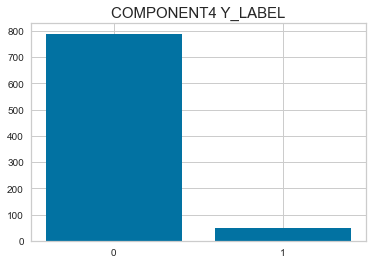

In [61]:
plt.figure(figsize=(6,4))
plt.title('COMPONENT4 Y_LABEL', fontsize=15)
plt.bar(df1.index, df1['Y_LABEL'])
plt.xticks([0,1])
plt.show()

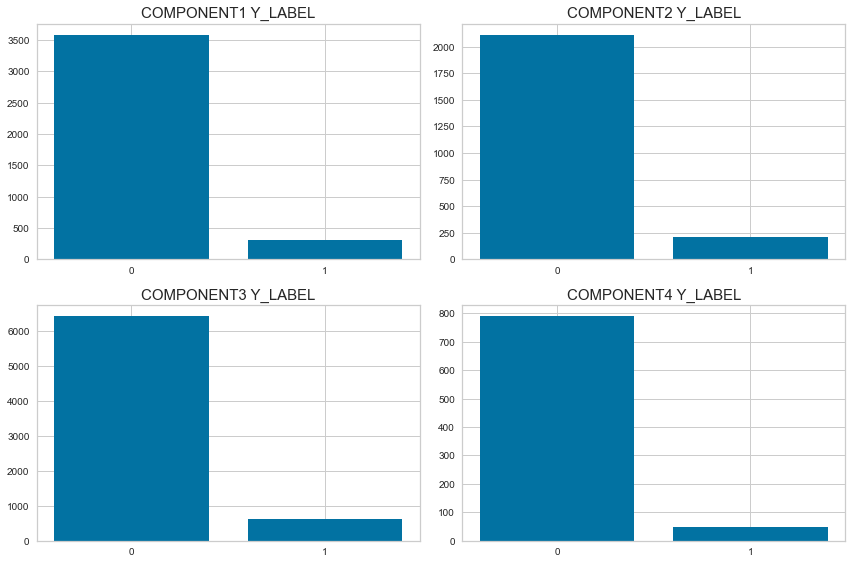

In [62]:
# COMPONENT_ARBITRARY 정상, 이상 개수
fig = plt.figure(figsize = (12, 8))

rows = 2
cols = 2

for enu,i in enumerate(['COMPONENT1','COMPONENT2','COMPONENT3','COMPONENT4']):
    df1 = pd.DataFrame(train[train['COMPONENT_ARBITRARY'] == i].Y_LABEL.value_counts())
    ax = fig.add_subplot(rows, cols, enu+1)
    # vibox(i)
    _ = ax.bar(df1.index, df1['Y_LABEL'])
    _ = ax.set_xticks([0,1])
    _ = ax.set_title(i + ' Y_LABEL', fontsize=15)

plt.tight_layout()  # 여백 자동으로 조정
plt.show()

#### 5) 전부 결측치인 칼럼

In [63]:
print('COMPONENT1 결측치 칼럼', c1_nan, '\n')
print('COMPONENT2 결측치 칼럼', c2_nan, '\n')
print('COMPONENT3 결측치 칼럼', c3_nan, '\n')
print('COMPONENT4 결측치 칼럼', c4_nan, '\n')

COMPONENT1 결측치 칼럼 ['U50', 'U20', 'U100', 'U75', 'U25', 'U4', 'U6', 'U14'] 

COMPONENT2 결측치 칼럼 ['FOXID', 'FUEL', 'V100', 'FTBN', 'FSO4', 'FOPTIMETHGLY', 'FNOX', 'FH2O', 'SOOTPERCENTAGE'] 

COMPONENT3 결측치 칼럼 ['FSO4', 'U25', 'FH2O', 'FOXID', 'FNOX', 'SOOTPERCENTAGE', 'FUEL', 'U100', 'U50', 'U75', 'U20', 'U14', 'U6', 'U4', 'FOPTIMETHGLY', 'V100', 'FTBN'] 

COMPONENT4 결측치 칼럼 ['FSO4', 'U25', 'FH2O', 'FOXID', 'FNOX', 'SOOTPERCENTAGE', 'FUEL', 'U100', 'U50', 'U75', 'U20', 'U14', 'U6', 'U4', 'FOPTIMETHGLY', 'V100', 'FTBN'] 



**V100, SOOTPERCENTAGE, FTBN, FOPTIMETHGLY, FH2O, FNOX, FOXID, FSO4, FUEL 칼럼은 COMPONENT1에만 있다** <br>

**U4 ~ U100 (입자 수) 칼럼은 COMPONENT2에만 있다**

#### 6) COMPONENT1에만 있는 V100, SOOTPERCENTAGE, FTBN, FOPTIMETHGLY, FH2O, FNOX, FOXID, FSO4, FUEL 칼럼 확인

> 6-1) V100

In [64]:
train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].V100.isna().sum()

166

COMPONENT1에도 166개의 결측치가 있다.

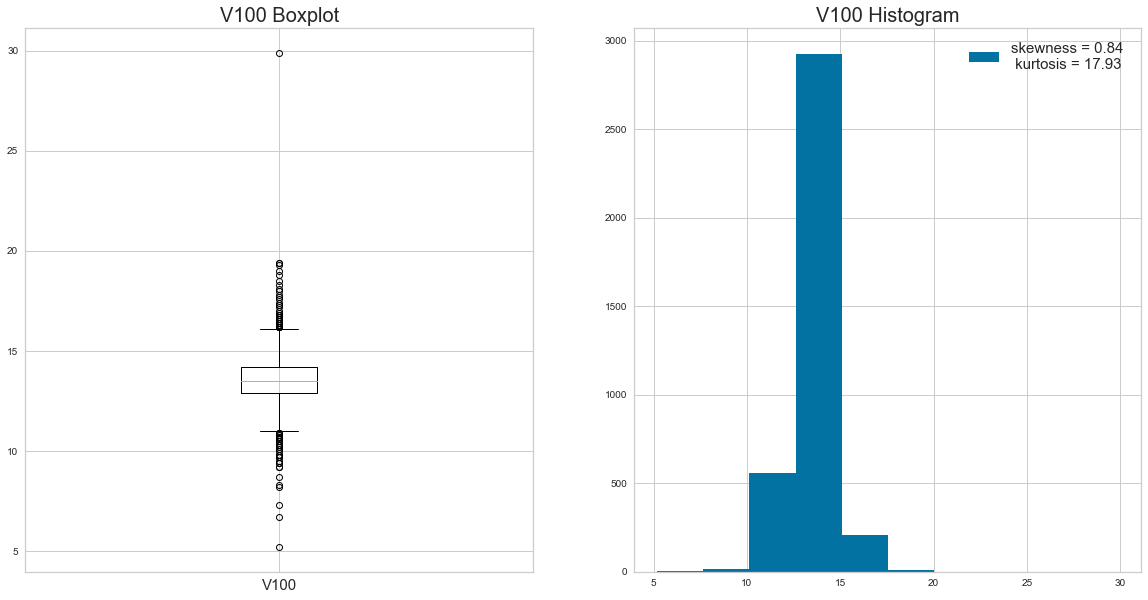

In [65]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('V100 Boxplot', fontsize=20)
plt.boxplot(train[train.V100.notnull()].V100)
plt.xticks([1],['V100'],fontsize=15)

plt.subplot(122)
plt.title('V100 Histogram', fontsize=20)
plt.hist(train[train.V100.notnull()].V100)
plt.legend(['skewness = {:.2f} \n kurtosis = {:.2f}'.format(train[train.V100.notnull()].V100.skew(),  # 왜도, 첨도
                                                            train[train.V100.notnull()].V100.kurt())], 
           loc = 'best', fontsize=15)

plt.show()

In [66]:
C1 = train[(train.COMPONENT_ARBITRARY == 'COMPONENT1')].copy()  # COMPONENT1 데이터 프레임 생성
C1.reset_index(drop=True, inplace=True)

C1['V100_MV'] = 0
C1.loc[C1.V100.isna(),'V100_MV'] = 1

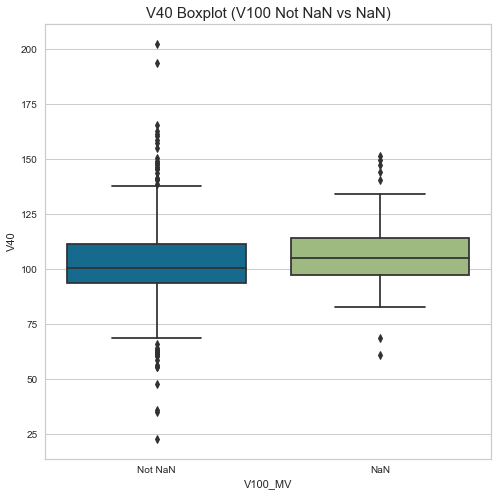

In [67]:
# V100이 결측치 vs 결측치 아닌 것에 대한 V40 상자그림
plt.figure(figsize=(8,8))
plt.title('V40 Boxplot (V100 Not NaN vs NaN)', fontsize=15)
sns.boxplot(x='V100_MV', y='V40', data=C1)
plt.xticks([0,1],['Not NaN','NaN'])
plt.show()

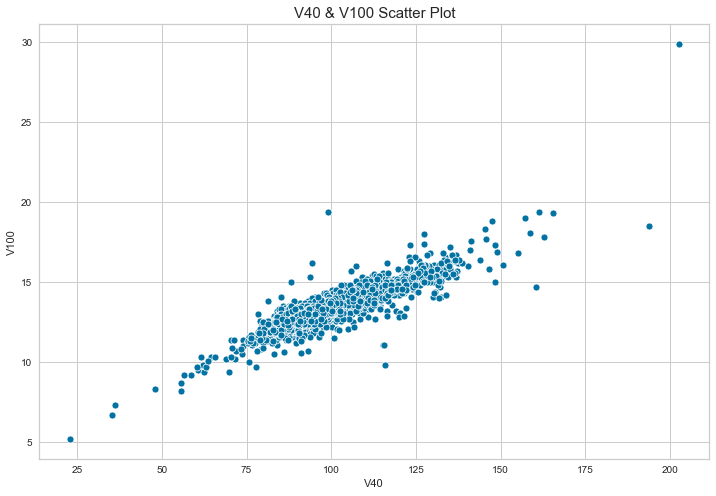

In [68]:
# V40, V100 산점도
plt.figure(figsize=(12,8))
plt.title('V40 & V100 Scatter Plot', fontsize=15)
sns.scatterplot(x='V40', y='V100', data=train[train.COMPONENT_ARBITRARY == 'COMPONENT1'])
plt.show()

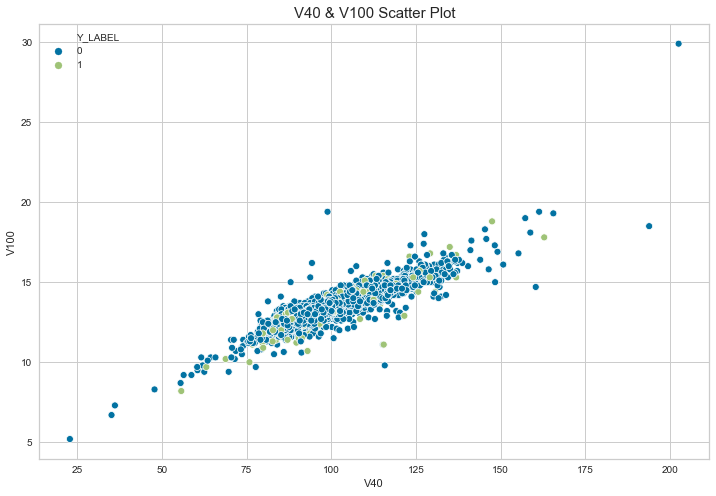

In [69]:
# V40, V100 산점도
plt.figure(figsize=(12,8))
plt.title('V40 & V100 Scatter Plot', fontsize=15)
sns.scatterplot(x='V40', y='V100', hue='Y_LABEL', data=train[train.COMPONENT_ARBITRARY == 'COMPONENT1'])
plt.show()

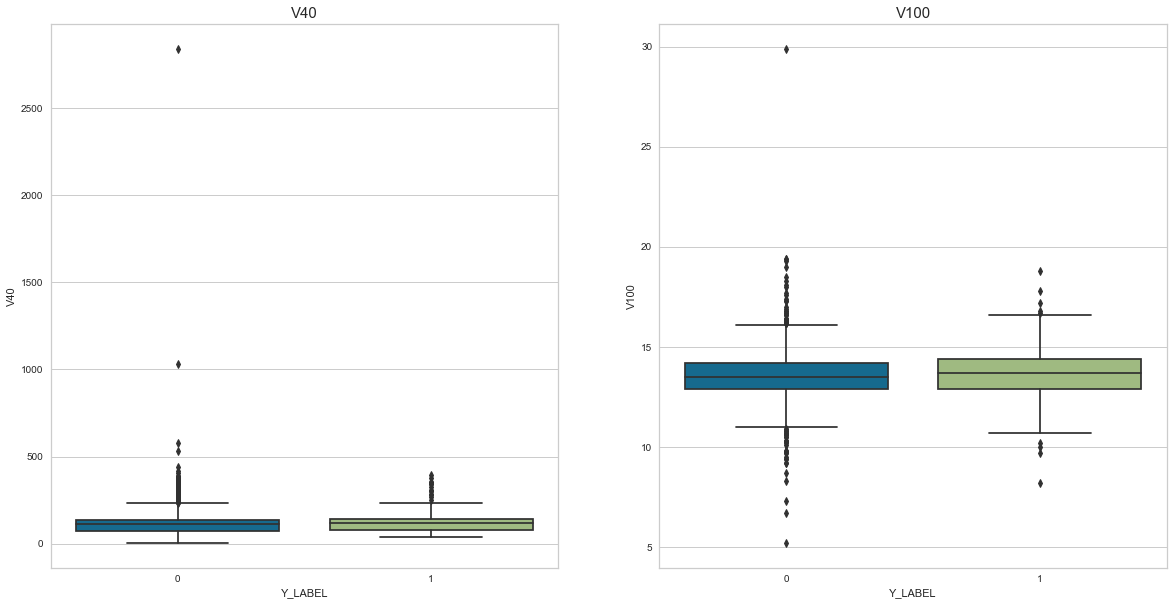

In [70]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('V40', fontsize=15)
sns.boxplot(x='Y_LABEL', y='V40', data=train)

plt.subplot(122)
plt.title('V100', fontsize=15)
sns.boxplot(x='Y_LABEL', y='V100', data=train[(train.V100.notnull())])

plt.show()

V100은 V40으로 충분히 설명 가능할 것이기에 V100은 드랍하는 것으로 판단한다

> 6-2) SOOTPERCENTAGE (Soot 함유량, %)

In [71]:
train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].SOOTPERCENTAGE.isna().sum()

0

In [72]:
train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].SOOTPERCENTAGE.describe()

count    3890.000000
mean        0.609254
std         0.652382
min         0.000000
25%         0.200000
50%         0.400000
75%         0.800000
max         6.500000
Name: SOOTPERCENTAGE, dtype: float64

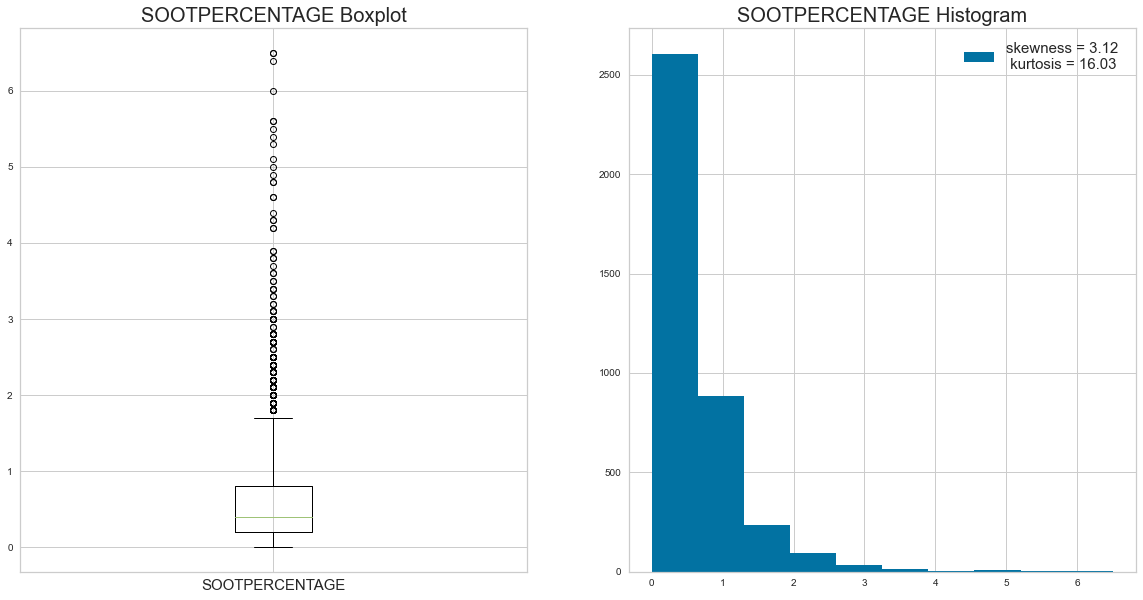

In [73]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('SOOTPERCENTAGE Boxplot', fontsize=20)
plt.boxplot(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].SOOTPERCENTAGE)
plt.xticks([1],['SOOTPERCENTAGE'],fontsize=15)

plt.subplot(122)
plt.title('SOOTPERCENTAGE Histogram', fontsize=20)
plt.hist(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].SOOTPERCENTAGE)
plt.legend(['skewness = {:.2f} \n kurtosis = {:.2f}'.format(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].SOOTPERCENTAGE.skew(), 
                                                            train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].SOOTPERCENTAGE.kurt())], 
           loc = 'best', fontsize=15)

plt.show()

> 6-3) FTBN

In [74]:
train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FTBN.describe()

count    3890.000000
mean        8.783239
std         1.339355
min         0.000000
25%         8.100000
50%         8.700000
75%         9.600000
max        27.700000
Name: FTBN, dtype: float64

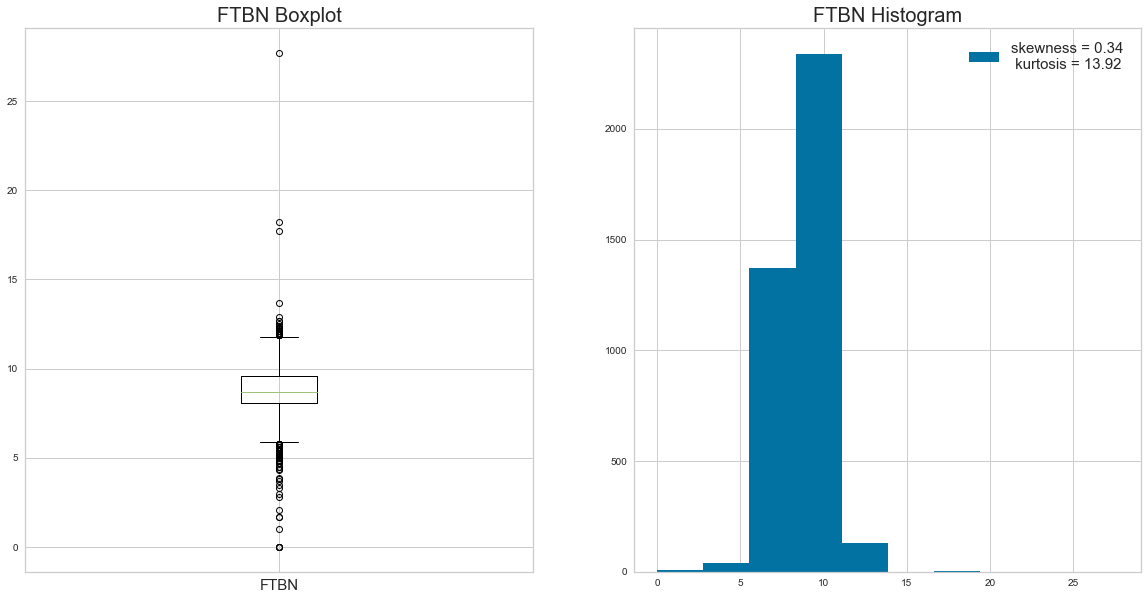

In [75]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('FTBN Boxplot', fontsize=20)
plt.boxplot(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FTBN)
plt.xticks([1],['FTBN'],fontsize=15)

plt.subplot(122)
plt.title('FTBN Histogram', fontsize=20)
plt.hist(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FTBN)
plt.legend(['skewness = {:.2f} \n kurtosis = {:.2f}'.format(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FTBN.skew(), 
                                                            train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FTBN.kurt())], 
           loc = 'best', fontsize=15)

plt.show()

> 6-4) FOPTIMETHGLY (비식별화, 단위 없음)

In [76]:
train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FOPTIMETHGLY.describe()

count    3890.000000
mean        0.532905
std         0.621937
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        13.000000
Name: FOPTIMETHGLY, dtype: float64

In [77]:
len(train[(train.COMPONENT_ARBITRARY == 'COMPONENT1') & (train.FOPTIMETHGLY == 0)])

1954

FOPTIMETHGLY는 데이터의 약 50%가 0이다

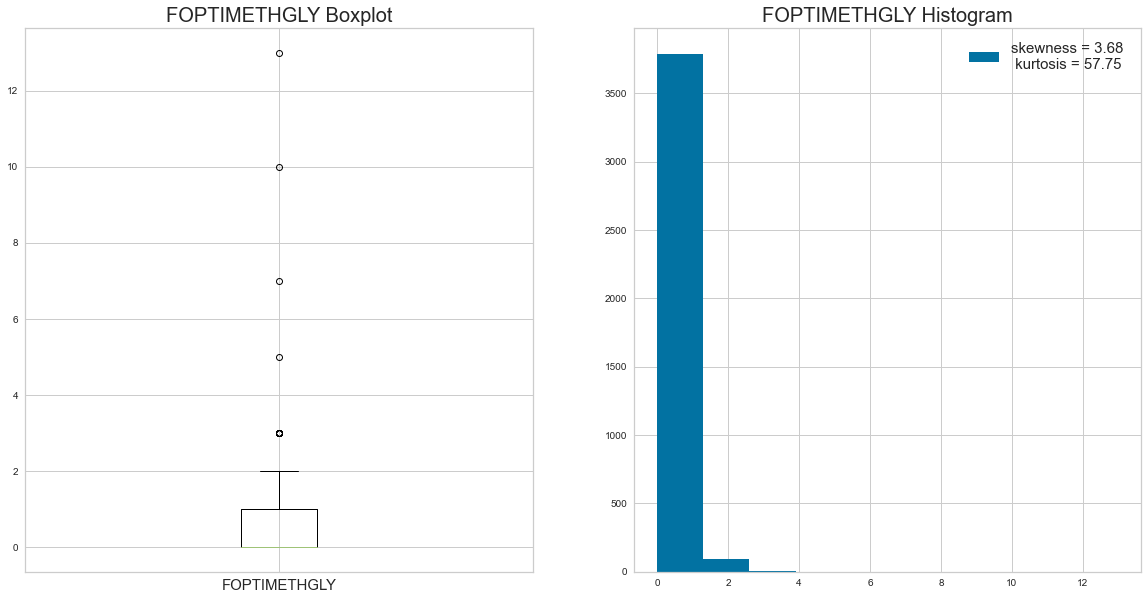

In [78]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('FOPTIMETHGLY Boxplot', fontsize=20)
plt.boxplot(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FOPTIMETHGLY)
plt.xticks([1],['FOPTIMETHGLY'],fontsize=15)

plt.subplot(122)
plt.title('FOPTIMETHGLY Histogram', fontsize=20)
plt.hist(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FOPTIMETHGLY)
plt.legend(['skewness = {:.2f} \n kurtosis = {:.2f}'.format(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FOPTIMETHGLY.skew(), 
                                                            train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FOPTIMETHGLY.kurt())], 
           loc = 'best', fontsize=15)

plt.show()

In [79]:
train[(train.COMPONENT_ARBITRARY == 'COMPONENT1') & (train.FOPTIMETHGLY == 0)].Y_LABEL.value_counts()

0    1819
1     135
Name: Y_LABEL, dtype: int64

In [80]:
train[(train.COMPONENT_ARBITRARY == 'COMPONENT1') & (train.FOPTIMETHGLY > 0)].Y_LABEL.value_counts()

0    1759
1     177
Name: Y_LABEL, dtype: int64

> 6-5) FH2O (Water 수치, 단위없음)

In [81]:
train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FH2O.describe()

count    3890.000000
mean       15.242159
std        17.591679
min         6.000000
25%        11.000000
50%        13.000000
75%        15.000000
max       320.000000
Name: FH2O, dtype: float64

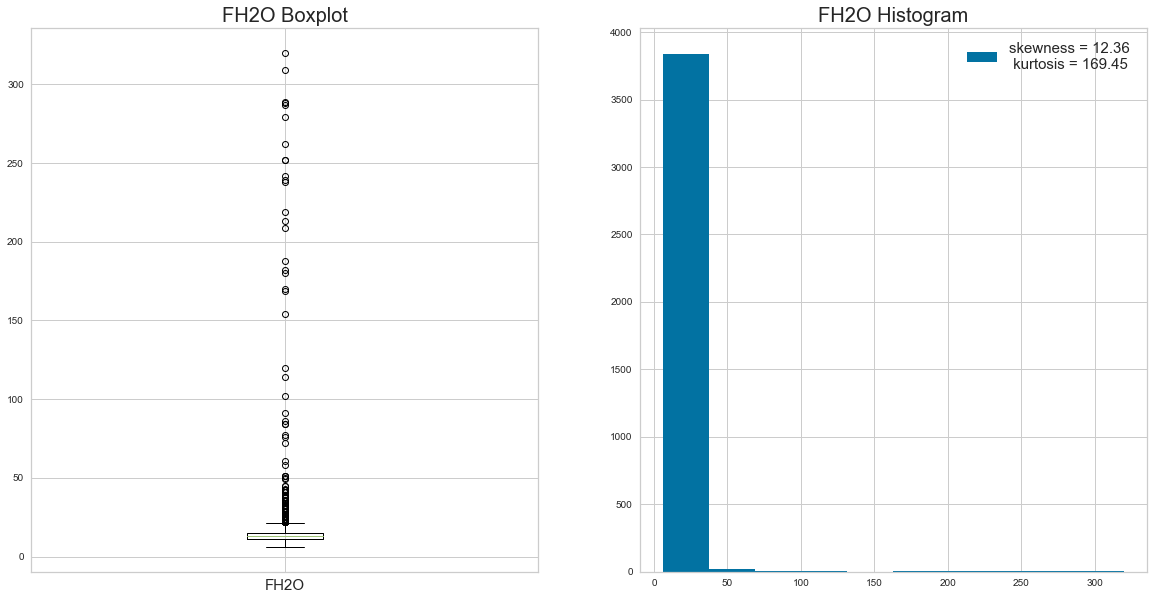

In [82]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('FH2O Boxplot', fontsize=20)
plt.boxplot(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FH2O)
plt.xticks([1],['FH2O'],fontsize=15)

plt.subplot(122)
plt.title('FH2O Histogram', fontsize=20)
plt.hist(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FH2O)
plt.legend(['skewness = {:.2f} \n kurtosis = {:.2f}'.format(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FH2O.skew(), 
                                                            train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FH2O.kurt())], 
           loc = 'best', fontsize=15)

plt.show()

FH2O는 6~15가 데이터의 75%를 차지한다

> 6-6) FNOX (질소산화물, 단위없음)

In [83]:
train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FNOX.describe()

count    3890.000000
mean        7.138303
std         1.860775
min         3.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        38.000000
Name: FNOX, dtype: float64

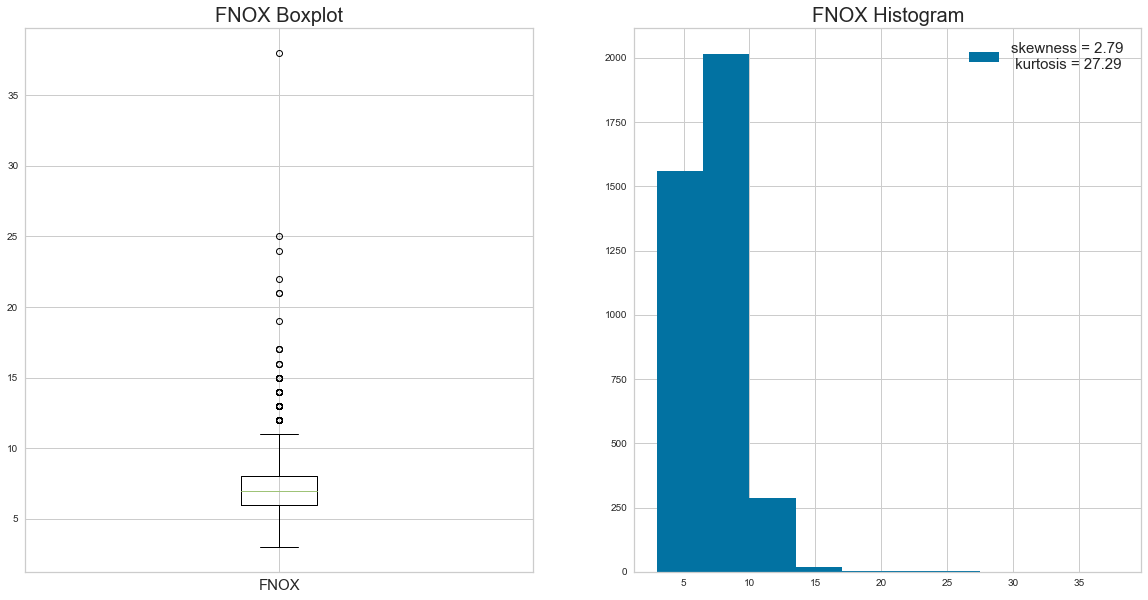

In [84]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('FNOX Boxplot', fontsize=20)
plt.boxplot(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FNOX)
plt.xticks([1],['FNOX'],fontsize=15)

plt.subplot(122)
plt.title('FNOX Histogram', fontsize=20)
plt.hist(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FNOX)
plt.legend(['skewness = {:.2f} \n kurtosis = {:.2f}'.format(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FNOX.skew(), 
                                                            train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FNOX.kurt())], 
           loc = 'best', fontsize=15)

plt.show()

> 6-7) FOXID (Oxidation 산화 수치, 단위없음)

In [85]:
train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FOXID.describe()

count    3890.000000
mean       12.495373
std         3.439535
min         4.000000
25%        10.000000
50%        12.000000
75%        14.750000
max        68.000000
Name: FOXID, dtype: float64

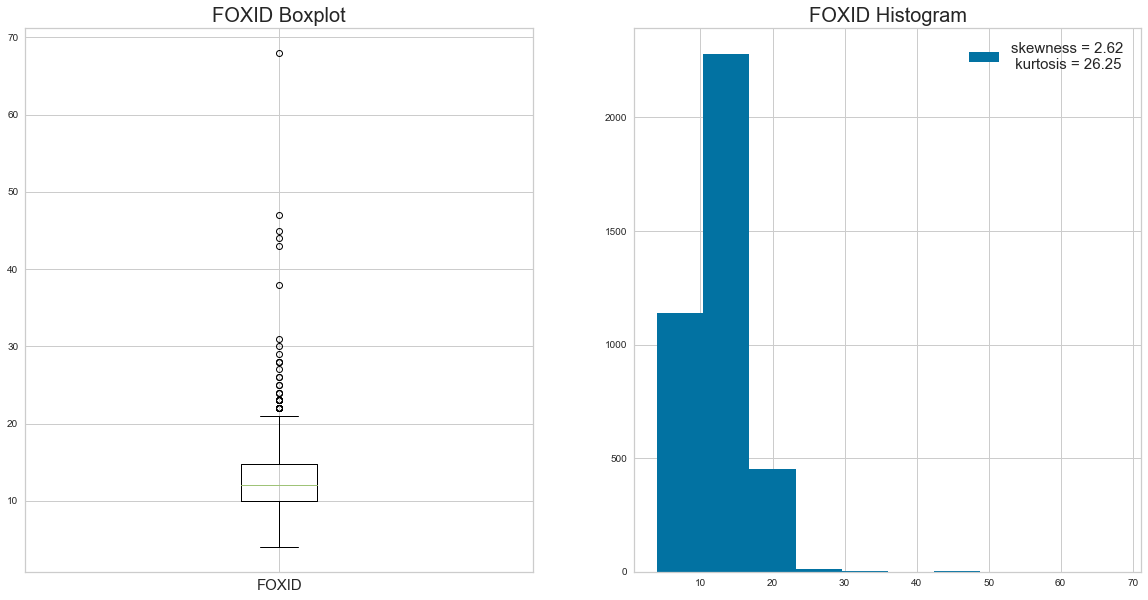

In [86]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('FOXID Boxplot', fontsize=20)
plt.boxplot(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FOXID)
plt.xticks([1],['FOXID'],fontsize=15)

plt.subplot(122)
plt.title('FOXID Histogram', fontsize=20)
plt.hist(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FOXID)
plt.legend(['skewness = {:.2f} \n kurtosis = {:.2f}'.format(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FOXID.skew(), 
                                                            train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FOXID.kurt())], 
           loc = 'best', fontsize=15)

plt.show()

> 6-8) FSO4

In [87]:
train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FSO4.describe()

count    3890.000000
mean       20.284319
std         3.234296
min        10.000000
25%        18.000000
50%        20.000000
75%        22.000000
max        68.000000
Name: FSO4, dtype: float64

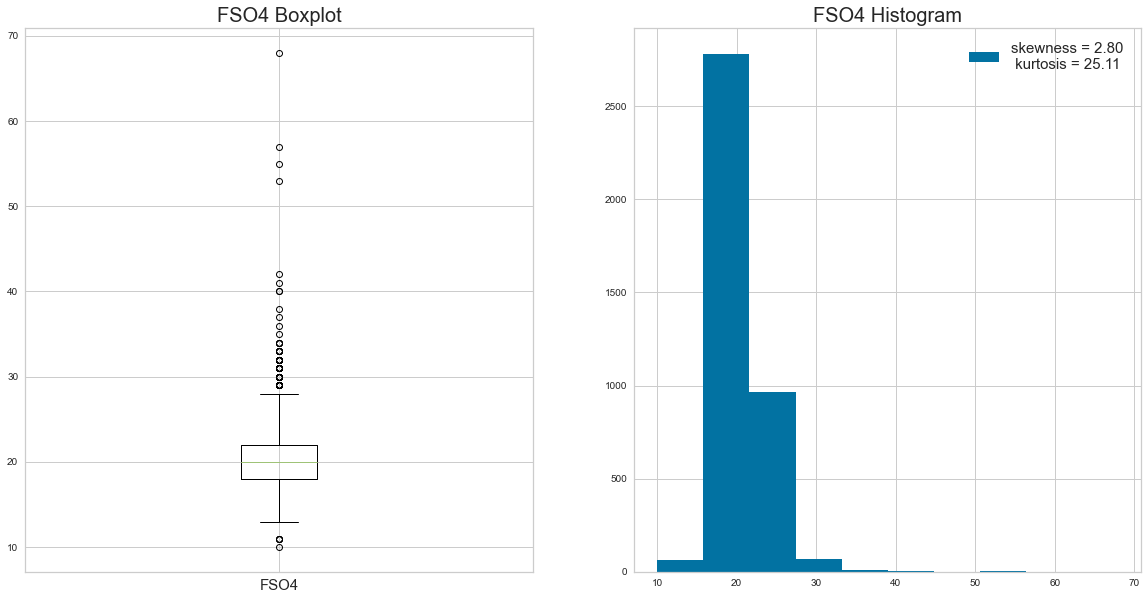

In [88]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('FSO4 Boxplot', fontsize=20)
plt.boxplot(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FSO4)
plt.xticks([1],['FSO4'],fontsize=15)

plt.subplot(122)
plt.title('FSO4 Histogram', fontsize=20)
plt.hist(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FSO4)
plt.legend(['skewness = {:.2f} \n kurtosis = {:.2f}'.format(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FSO4.skew(), 
                                                            train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FSO4.kurt())], 
           loc = 'best', fontsize=15)

plt.show()

> 6-8) FUEL

In [89]:
train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FUEL.describe()

count    3890.000000
mean        0.185347
std         0.899253
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: FUEL, dtype: float64

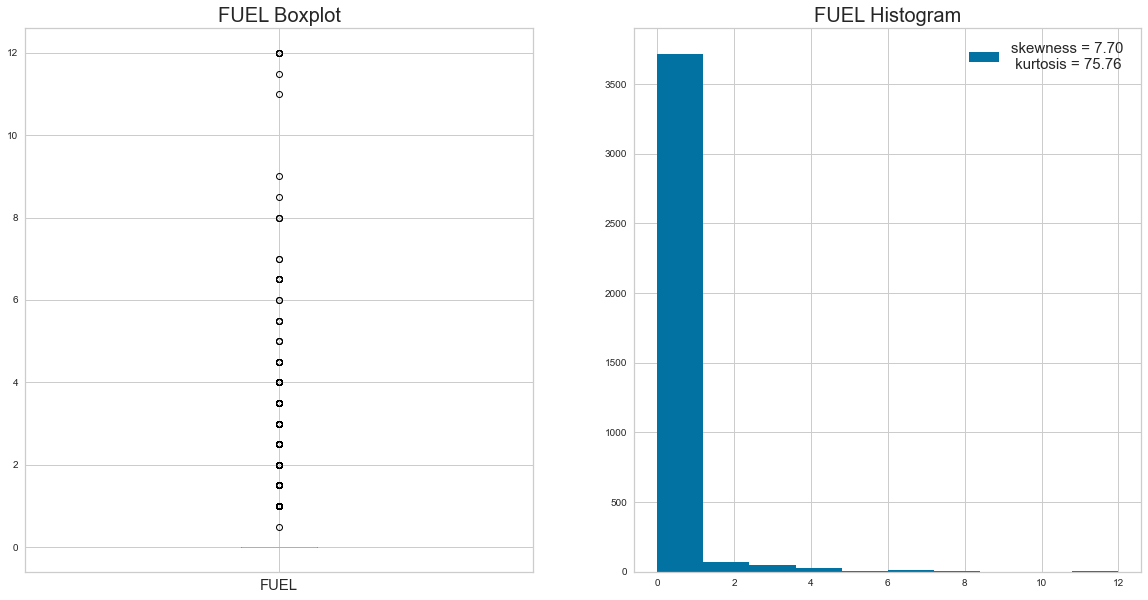

In [90]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('FUEL Boxplot', fontsize=20)
plt.boxplot(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FUEL)
plt.xticks([1],['FUEL'],fontsize=15)

plt.subplot(122)
plt.title('FUEL Histogram', fontsize=20)
plt.hist(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FUEL)
plt.legend(['skewness = {:.2f} \n kurtosis = {:.2f}'.format(train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FUEL.skew(), 
                                                            train[train.COMPONENT_ARBITRARY == 'COMPONENT1'].FUEL.kurt())], 
           loc = 'best', fontsize=15)

plt.show()

In [91]:
train[(train.COMPONENT_ARBITRARY == 'COMPONENT1') & (train.FUEL > 0)].Y_LABEL.value_counts()

0    269
1     18
Name: Y_LABEL, dtype: int64

FUEL은 0이 75% 넘게 차지하는데 0보다 크더라도 이상 여부에 영향을 주지는 않는다

#### 7) COMPONENT2에만 있는 U4 ~ U100 (입자 수) 분포 확인

In [92]:
train[train.COMPONENT_ARBITRARY == 'COMPONENT2'][['U4','U6','U14','U20','U25','U50','U75','U100']].describe()

,U4,U6,U14,U20,U25,U50,U75,U100
count,2118.000000,2118.000000,2118.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000
mean,19415.597262,5488.693107,239.938149,56.063472,29.870898,6.185233,0.417098,0.173575
std,40145.311444,15474.146283,685.053457,184.332678,97.459625,36.639482,1.626333,0.878892
min,154.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5409.250000,636.750000,22.000000,5.000000,3.000000,0.000000,0.000000,0.000000
50%,12691.500000,1753.000000,57.000000,13.000000,7.000000,1.000000,0.000000,0.000000
75%,24535.750000,5517.750000,189.000000,39.250000,23.000000,3.000000,0.000000,0.000000
max,844421.000000,412627.000000,11296.000000,2932.000000,1651.000000,939.000000,33.000000,18.000000


In [93]:
# 파생변수 생성해서 상관관계 파악
df_u = train[train.U4.notnull()][['U4','U6','U14','U20','U25','U50','U75','U100']]
df_u

,U4,U6,U14,U20,U25,U50,U75,U100
1,1454.0,216.0,6.0,4.0,2.0,1.0,0.0,0.0
2,41081.0,11261.0,39.0,3.0,0.0,0.0,0.0,0.0
15,1181.0,274.0,13.0,4.0,2.0,2.0,0.0,0.0
27,24308.0,9765.0,478.0,134.0,62.0,44.0,0.0,0.0
34,12543.0,541.0,46.0,5.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
14073,36900.0,1839.0,59.0,20.0,11.0,1.0,0.0,0.0
14079,26193.0,6003.0,85.0,11.0,5.0,2.0,0.0,0.0
14085,7837.0,4165.0,260.0,89.0,34.0,0.0,0.0,0.0
14093,18890.0,1625.0,100.0,8.0,7.0,0.0,0.0,0.0


In [94]:
# 분할
list1 = ['U4','U6','U14','U20','U25','U50','U75','U100']

for i, col in enumerate(list1):
    if i <= 6:
        df_u[f'{col}~{list1[i+1]}'] = df_u[col] - df_u[list1[i+1]]

In [95]:
df_u = df_u[['U4~U6','U6~U14','U14~U20','U20~U25','U25~U50','U50~U75','U75~U100','U100']]
df_u

,U4~U6,U6~U14,U14~U20,U20~U25,U25~U50,U50~U75,U75~U100,U100
1,1238.0,210.0,2.0,2.0,1.0,1.0,0.0,0.0
2,29820.0,11222.0,36.0,3.0,0.0,0.0,0.0,0.0
15,907.0,261.0,9.0,2.0,0.0,2.0,0.0,0.0
27,14543.0,9287.0,344.0,72.0,18.0,44.0,0.0,0.0
34,12002.0,495.0,41.0,3.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
14073,35061.0,1780.0,39.0,9.0,10.0,1.0,0.0,0.0
14079,20190.0,5918.0,74.0,6.0,3.0,2.0,0.0,0.0
14085,3672.0,3905.0,171.0,55.0,34.0,0.0,0.0,0.0
14093,17265.0,1525.0,92.0,1.0,7.0,0.0,0.0,0.0


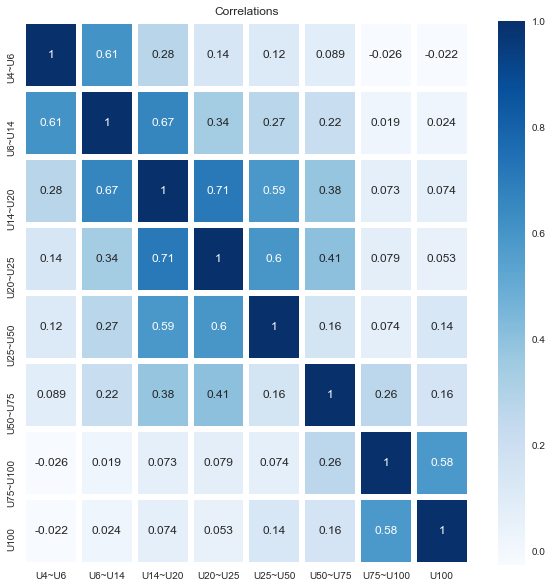

In [96]:
plt.figure(figsize=(10,10))
sns.heatmap(df_u.corr(), 
            cmap='Blues',  # 색 지정
            annot=True,  # 값 표시
            linewidth = 5
           )
plt.title('Correlations')
plt.show()

인접한 크기끼리는 상관관계가 조금 있는 모습을 확인할 수 있다

In [97]:
df_u.describe()

,U4~U6,U6~U14,U14~U20,U20~U25,U25~U50,U50~U75,U75~U100,U100
count,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000
mean,13926.904155,5248.754958,183.633617,26.209160,23.480170,6.201133,0.239377,0.174693
std,28863.541730,15042.589608,531.637555,107.177611,86.247988,37.843001,0.974312,0.867010
min,59.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3731.750000,606.250000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,8621.000000,1680.000000,43.000000,5.000000,5.000000,1.000000,0.000000,0.000000
75%,17297.250000,5178.750000,139.750000,15.000000,16.000000,2.000000,0.000000,0.000000
max,479731.000000,405300.000000,8731.000000,2236.000000,1646.000000,929.000000,21.000000,18.000000


In [98]:
df_u['Y_LABEL'] = train.loc[train.index.isin(df_u.index), 'Y_LABEL']
df_u.head()

,U4~U6,U6~U14,U14~U20,U20~U25,U25~U50,U50~U75,U75~U100,U100,Y_LABEL
1,1238.0,210.0,2.0,2.0,1.0,1.0,0.0,0.0,0
2,29820.0,11222.0,36.0,3.0,0.0,0.0,0.0,0.0,1
15,907.0,261.0,9.0,2.0,0.0,2.0,0.0,0.0,0
27,14543.0,9287.0,344.0,72.0,18.0,44.0,0.0,0.0,0
34,12002.0,495.0,41.0,3.0,2.0,0.0,0.0,0.0,0


In [99]:
# 오일 정상, 이상별 분포 차이 시각화 함수
def num_plot(df, column):
    
    train_0 = df[df['Y_LABEL'] == 0]
    train_1 = df[df['Y_LABEL'] == 1]

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.distplot(train_0[column], color = 'blue',
                ax = axes[0])
    axes[0].tick_params(labelsize=12)
    axes[0].set_title('anomaly = 0')
    axes[0].set_ylabel('count')
    axes[0].set_xlim(None,df_u[column].max())

    sns.distplot(train_1[column], color = 'blue',
                ax = axes[1])
    axes[1].tick_params(labelsize=12)
    axes[1].set_title('anomaly = 1')
    axes[1].set_ylabel('count')
    axes[1].set_xlim(None,df_u[column].max())

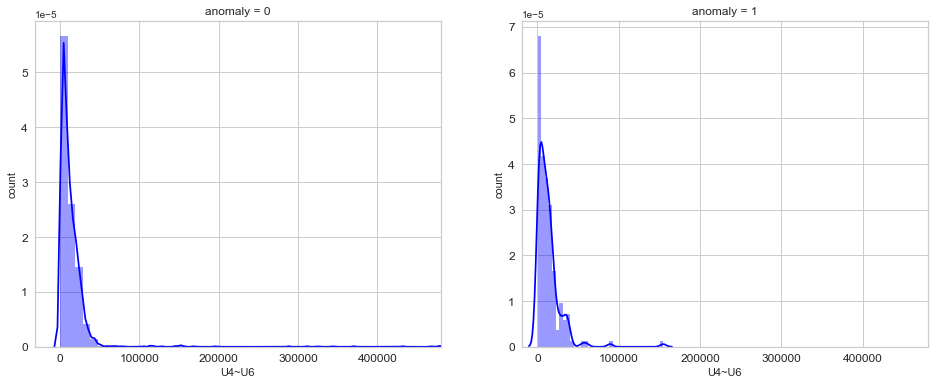

In [100]:
num_plot(df_u, 'U4~U6')

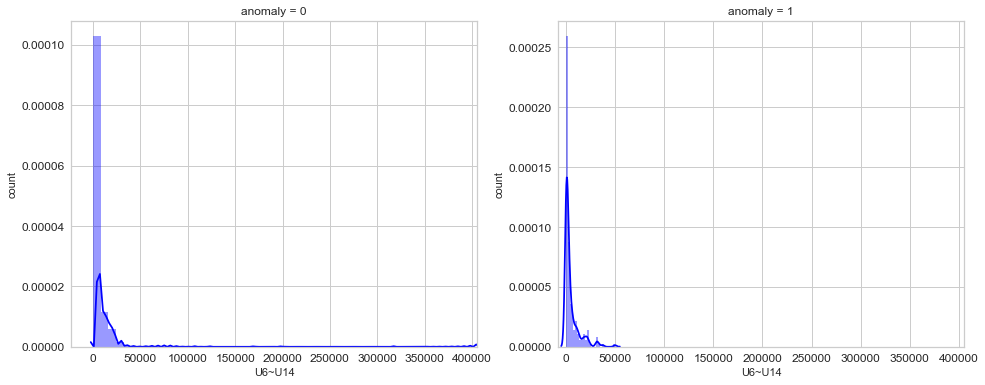

In [101]:
num_plot(df_u, 'U6~U14')

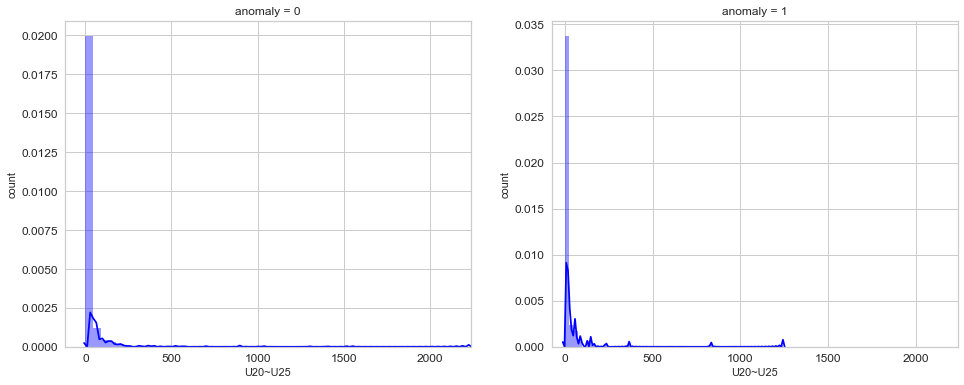

In [102]:
num_plot(df_u, 'U20~U25')

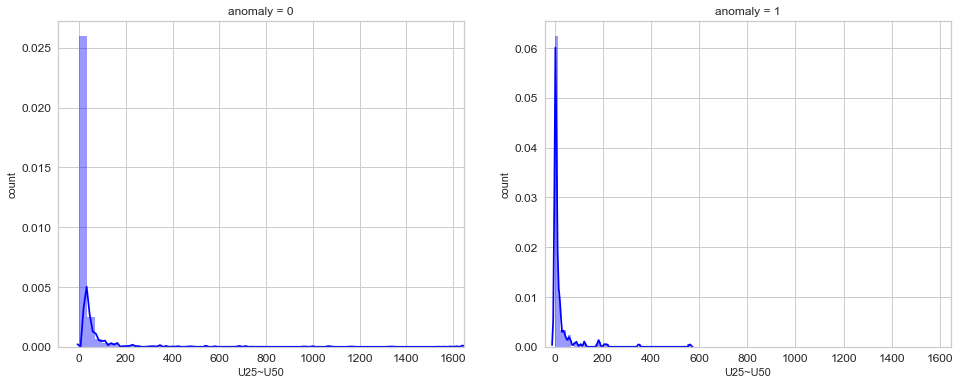

In [103]:
num_plot(df_u, 'U25~U50')

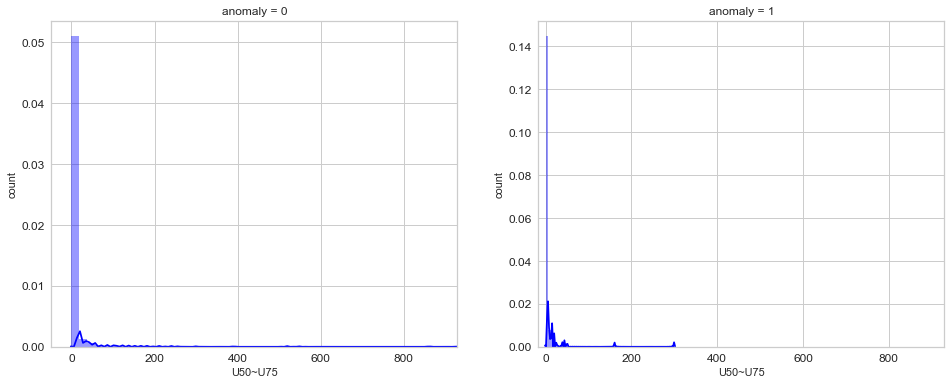

In [104]:
num_plot(df_u, 'U50~U75')

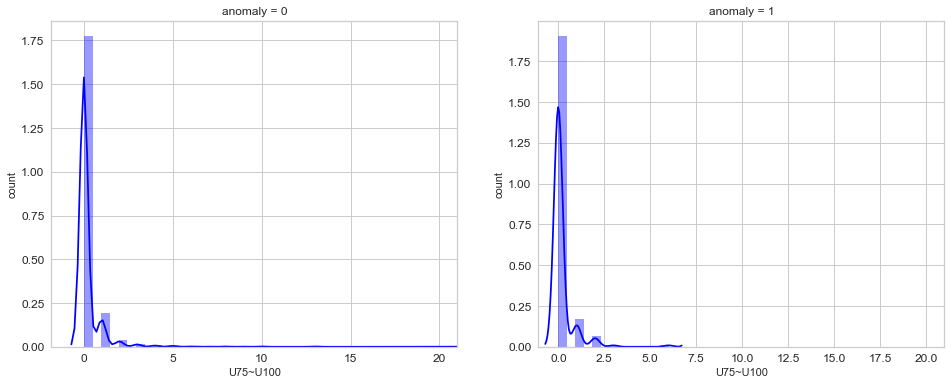

In [105]:
num_plot(df_u, 'U75~U100')

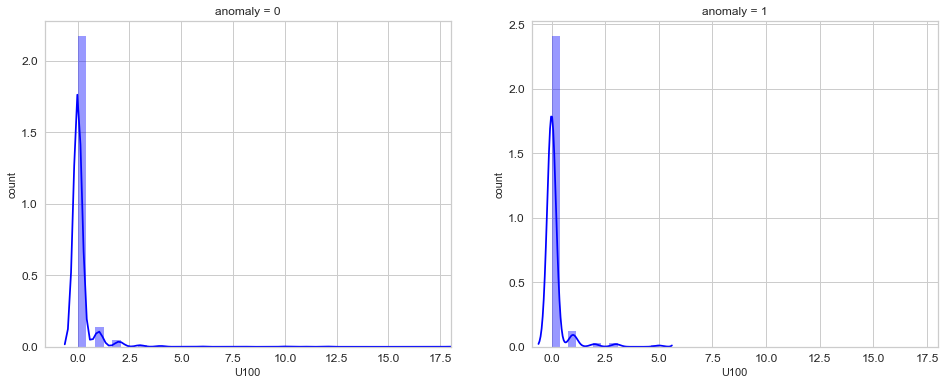

In [106]:
num_plot(df_u, 'U100')

입자 크기에 따른 오일 정상, 이상 차이가 있어보이지는 않는다

In [107]:
# 앞서 확인한 상관관계 의하여 분할
df_u = train[train.U4.notnull()][['U4','U6','U14','U20','U25','U50','U75','U100']]

df_u['U4~U14'] = df_u['U4'] - df_u['U14']
df_u['U14~U50'] = df_u['U14'] - df_u['U50']
df_u['U50~U75'] = df_u['U50'] - df_u['U75']

df_u = df_u[['U4~U14','U14~U50','U50~U75','U75']]
df_u.head()

,U4~U14,U14~U50,U50~U75,U75
1,1448.0,5.0,1.0,0.0
2,41042.0,39.0,0.0,0.0
15,1168.0,11.0,2.0,0.0
27,23830.0,434.0,44.0,0.0
34,12497.0,46.0,0.0,0.0


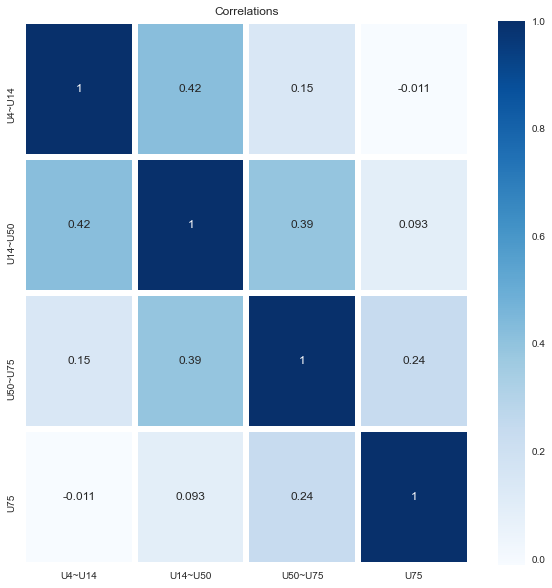

In [108]:
plt.figure(figsize=(10,10))
sns.heatmap(df_u.corr(), 
            cmap='Blues',  # 색 지정
            annot=True,  # 값 표시
            linewidth = 5
           )
plt.title('Correlations')
plt.show()

변수간 상관관계가 사라진 것을 확인할 수 있다

In [109]:
df_u.describe()

,U4~U14,U14~U50,U50~U75,U75
count,2118.000000,2118.000000,2118.000000,2118.000000
mean,19175.659112,233.322946,6.201133,0.414070
std,39853.898120,669.295544,37.843001,1.639132
min,138.000000,0.000000,0.000000,0.000000
25%,5353.750000,21.000000,0.000000,0.000000
50%,12479.000000,55.000000,1.000000,0.000000
75%,24204.500000,183.500000,2.000000,0.000000
max,837094.000000,11296.000000,929.000000,33.000000


In [110]:
df_u['Y_LABEL'] = train.loc[train.index.isin(df_u.index), 'Y_LABEL']

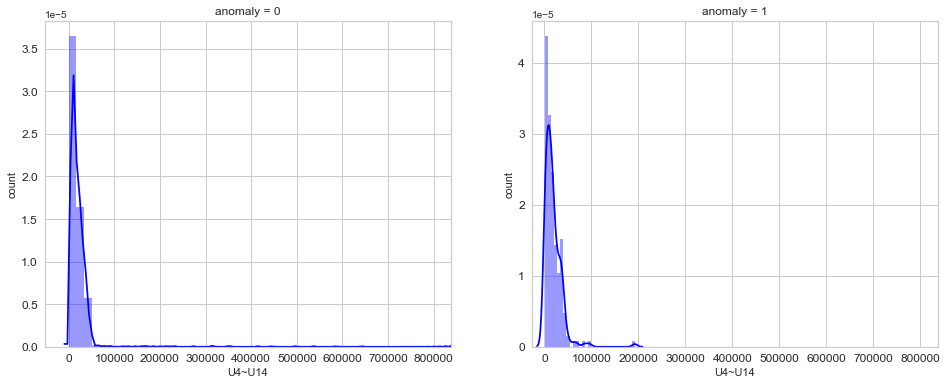

In [111]:
num_plot(df_u, 'U4~U14')

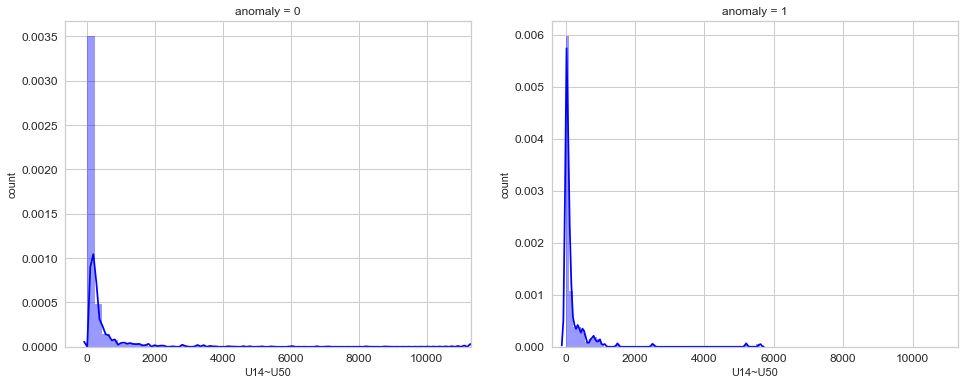

In [112]:
num_plot(df_u, 'U14~U50')

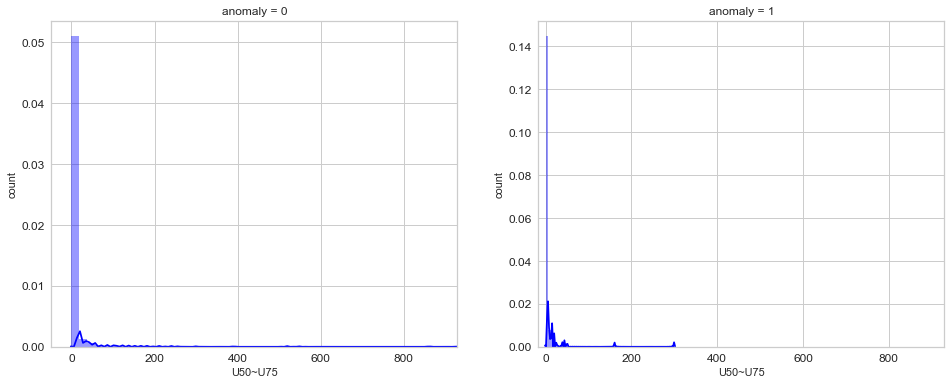

In [113]:
num_plot(df_u, 'U50~U75')

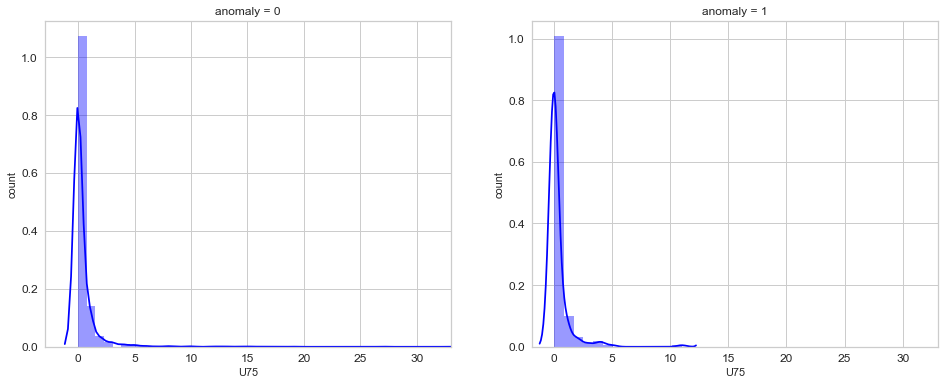

In [114]:
num_plot(df_u, 'U75')

여전히 오일 정상과 이상에 따른 분포 차이가 있지는 않다

#### 8) K (Potassium 함유량, 칼륨, ppm)
- 결측치 2299개

In [115]:
train[train.K.notnull()].K.describe()

count    11796.000000
mean         3.611224
std         15.630404
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max        705.000000
Name: K, dtype: float64

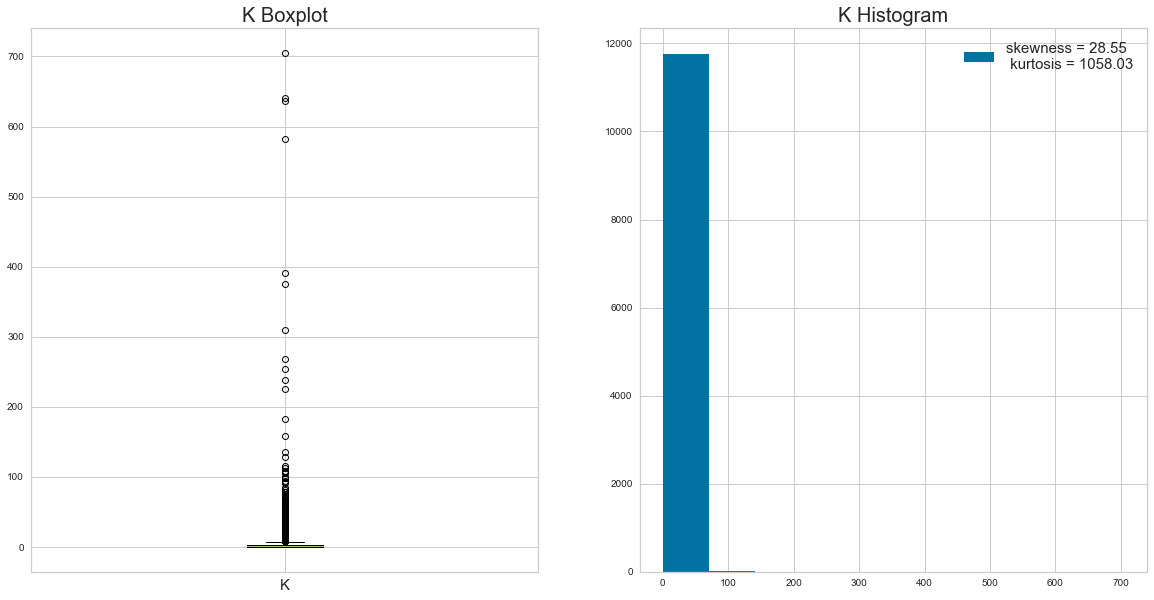

In [116]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('K Boxplot', fontsize=20)
plt.boxplot(train[train.K.notnull()].K)
plt.xticks([1],['K'],fontsize=15)

plt.subplot(122)
plt.title('K Histogram', fontsize=20)
plt.hist(train[train.K.notnull()].K)
plt.legend(['skewness = {:.2f} \n kurtosis = {:.2f}'.format(train[train.K.notnull()].K.skew(), 
                                                            train[train.K.notnull()].K.kurt())], 
           loc = 'best', fontsize=15)

plt.show()

In [117]:
pd.DataFrame(train.corr()['K'].sort_values(ascending=False)).style.background_gradient(cmap='viridis')

,K
K,1.000000
SI,0.605120
TI,0.524070
MN,0.510543
NI,0.341336
NA,0.316192
FE,0.310823
CO,0.239647
PQINDEX,0.237947
V,0.224839


K(칼륨)과 SI(실리콘)이 상관관계 0.6으로 조금 관련이 있는 모습을 확인할 수 있다

#### 9) CD (Cadmium 함유량, 카드뮴, ppm)
- 결측치 1394개

In [118]:
train[train.CD.notnull()].CD.describe()

count    12701.000000
mean         0.015589
std          0.209407
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         18.000000
Name: CD, dtype: float64

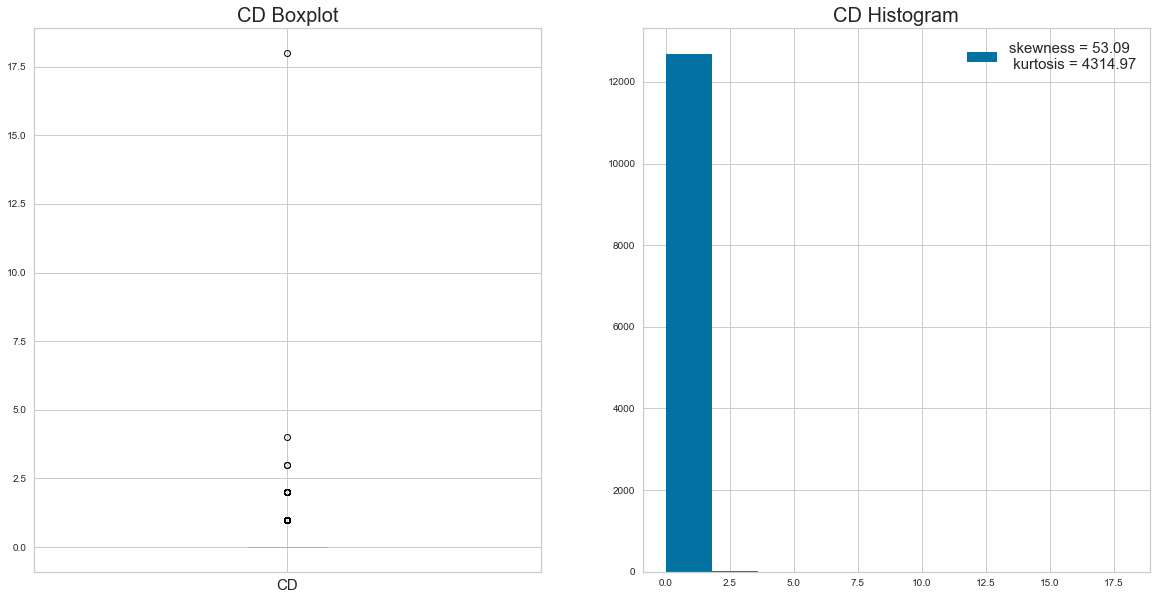

In [119]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('CD Boxplot', fontsize=20)
plt.boxplot(train[train.CD.notnull()].CD)
plt.xticks([1],['CD'],fontsize=15)

plt.subplot(122)
plt.title('CD Histogram', fontsize=20)
plt.hist(train[train.CD.notnull()].CD)
plt.legend(['skewness = {:.2f} \n kurtosis = {:.2f}'.format(train[train.CD.notnull()].CD.skew(), 
                                                            train[train.CD.notnull()].CD.kurt())], 
           loc = 'best', fontsize=15)

plt.show()

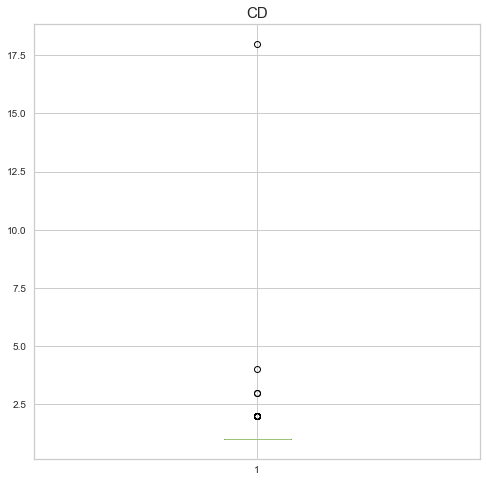

In [120]:
plt.figure(figsize=(8,8))
plt.title('CD', fontsize=15)
plt.boxplot(train[(train.CD > 0)].CD)
plt.show()

CD(카드뮴)는 데이터의 약 75%가 0이다

### YEAR(오일 샘플 및 진단 해)

In [121]:
# train, test data에서 year 개수
print(train['YEAR'].value_counts().sort_index(), '\n')
print(test['YEAR'].value_counts().sort_index())

2007     328
2008    1419
2009     949
2010     866
2011    1146
2012    1073
2013    1189
2014    1400
2015    1156
2016     942
2017     896
2018     878
2019     649
2020     373
2021     477
2022     354
Name: YEAR, dtype: int64 

2007    141
2008    610
2009    399
2010    395
2011    465
2012    463
2013    540
2014    567
2015    491
2016    430
2017    371
2018    354
2019    272
2020    183
2021    210
2022    150
Name: YEAR, dtype: int64


YEAR 칼럼은 train, test 모두 2007년 ~ 2022년까지 존재

In [122]:
# 연도별 오일 이상 여부 확인
pd.DataFrame(train.groupby(['YEAR', 'Y_LABEL'])['Y_LABEL'].count())

Y_LABEL
YEAR Y_LABEL         
2007 0            292
     1             36
2008 0           1254
     1            165
2009 0            800
     1            149
2010 0            738
     1            128
2011 0           1046
     1            100
2012 0            989
     1             84
2013 0           1100
     1             89
2014 0           1284
     1            116
2015 0           1079
     1             77
2016 0            889
     1             53
2017 0            850
     1             46
2018 0            830
     1             48
2019 0            628
     1             21
2020 0            351
     1             22
2021 0            441
     1             36
2022 0            321
     1             33

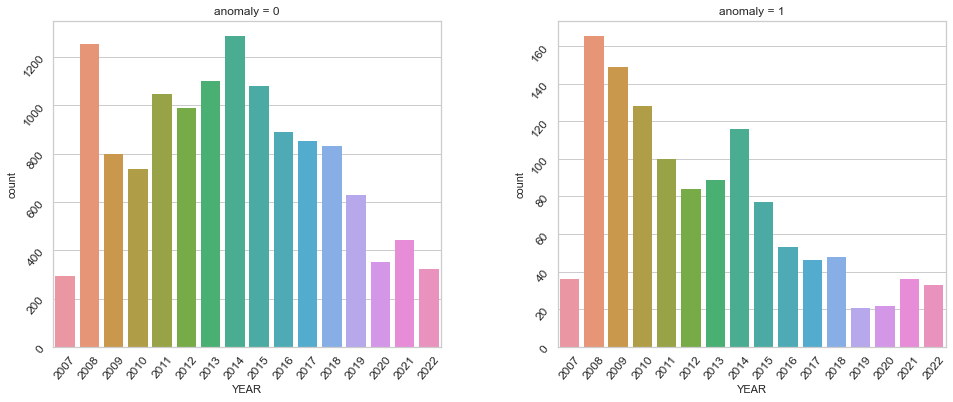

In [123]:
# 연도별 오일 정상, 이상 개수 비교
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x = 'YEAR',
              data = train[train.Y_LABEL == 0],
              ax = ax[0])
ax[0].tick_params(labelsize=12)
ax[0].set_title('anomaly = 0')
ax[0].set_ylabel('count')
ax[0].tick_params(rotation=50)

sns.countplot(x = 'YEAR',
              data = train[train.Y_LABEL == 1],
              ax = ax[1])
ax[1].tick_params(labelsize=12)
ax[1].set_title('anomaly = 1')
ax[1].set_ylabel('count')
ax[1].tick_params(rotation=50)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [124]:
for i in range(2007, 2023):
    a = len(train[(train.YEAR == i) & (train.Y_LABEL == 1)])
    b = len(train[(train.YEAR == i)])
    print(f'{i} : {round(a/b,3)}')

2007 : 0.11
2008 : 0.116
2009 : 0.157
2010 : 0.148
2011 : 0.087
2012 : 0.078
2013 : 0.075
2014 : 0.083
2015 : 0.067
2016 : 0.056
2017 : 0.051
2018 : 0.055
2019 : 0.032
2020 : 0.059
2021 : 0.075
2022 : 0.093


연도별 이상치 비율 보면 2010년도까지는 많았다가 이후에는 줄어든 것을 확인할 수 있다

### 오일 정상, 이상 동일한 비율로 상관관계 확인

In [125]:
train_1 = train[train.Y_LABEL == 1]
train_0 = train[train.Y_LABEL == 0][:1203]  # 정상 오일에서 임의로 1203개 추출

train_same = pd.concat([train_0, train_1], axis=0)  # 두 데이터 프레임 다시 하나로 합하기

train_same_corr = train_same.drop(train_same[['ID','COMPONENT_ARBITRARY','YEAR']], axis=1)
train_same_corr = train_same_corr.astype({'Y_LABEL' : 'int'})

corr = train_same_corr.corr(method='pearson')  # 피어슨 상관계수 선택

correlation = corr.unstack()
train_temp = pd.DataFrame(correlation['Y_LABEL'].sort_values(ascending=False), columns=['Y_LABEL'])
train_temp.style.background_gradient(cmap='viridis')

,Y_LABEL
Y_LABEL,1.000000
AL,0.283710
BA,0.208704
FOPTIMETHGLY,0.090576
U4,0.080192
ANONYMOUS_1,0.080132
U6,0.076368
NI,0.070033
FE,0.068127
FNOX,0.062748


AL, BA, CA의 상대적으로 높은 상관관계를 확인했지만 임의로 선택한 데이터이기에 성급한 일반화일 가능성이 존재한다

## Preprocessing

**1. V100 칼럼 삭제**
- 근거 : 결측치 다수, V40과 상관관계 높으며, 논문 활용

**2. FNOX, FOXID, FSO4 3개의 평균 파생변수 생성** <br>
<br>
**3. 입자 크기 그룹화**
- U4 이상 U14 미만
- U14 이상 U50 미만
- U50 이상 U75 미만
- U75 이상

**4. 결측값은 중앙값으로 대체**
- 왜곡이 심한 분포이기에 중앙값으로 대체하기로 결정

In [126]:
# V100 칼럼 삭제
train.drop(['V100'], axis=1, inplace=True)

# FNOX, FOXID, FSO4 3개의 평균 파생변수 생성
train['FOXs'] = (train['FNOX'] + train['FOXID'] + train['FSO4']) / 3

# 파생변수 생성 후, FNOX, FOXID, FSO4 칼럼 제거
train.drop(['FNOX','FOXID','FSO4'], axis=1, inplace=True)

# 입자 크기 그룹화
train['U4~U14'] = train['U4'] - train['U14']
train['U14~U50'] = train['U14'] - train['U50']
train['U50~U75'] = train['U50'] - train['U75']
train['U75~'] = train['U75']

# 생성 후 기존 입자 크기 칼럼 제거
train.drop(['U100','U75','U50','U25','U20','U14','U6','U4'], axis=1, inplace=True)

# 결측값 처리
nan_cols = ['U14~U50','U4~U14','U75~','U50~U75','FH2O','FOXs','FUEL','SOOTPERCENTAGE','FTBN','FOPTIMETHGLY','K','CD']

for col in nan_cols:
    train[col].fillna(train[col].median(), inplace=True)
    
train = train[['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR','SAMPLE_TRANSFER_DAY', 
               'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA', 'BE', 'CA','CD', 'CO', 'CR', 'CU', 
               'FH2O', 'FOPTIMETHGLY', 'FTBN', 'FE', 'FUEL','H2O', 'K', 'LI', 'MG', 'MN', 
               'MO', 'NA', 'NI', 'P', 'PB', 'PQINDEX','S', 'SB', 'SI', 'SN','SOOTPERCENTAGE', 
               'TI', 'V', 'V40', 'ZN', 'FOXs', 'U4~U14','U14~U50', 'U50~U75', 'U75~','Y_LABEL']]

## Feature Selection

**tree 기반 모델 중심으로 feature selection 진행**

In [127]:
# Feature Selection을 위한 데이터 프레임 복제
train_fs = train.copy()
test_fs = test.copy()

# 범주형 변수
categorical_features = ['COMPONENT_ARBITRARY', 'YEAR']

# train 데이터셋 분리
all_X = train_fs.drop(['ID', 'Y_LABEL'], axis=1)  # 독립변수
all_y = train_fs['Y_LABEL']  # 종속변수(타겟변수)

test_fs = test_fs.drop(['ID'], axis=1)

# train과 valid로 나누기
train_X, val_X, train_y, val_y = train_test_split(all_X, all_y, test_size=0.2, random_state=42, stratify=all_y)

def get_values(value):
    return value.values.reshape(-1, 1)

# 수치형 변수 스케일링
for col in train_X.columns:
    if col not in categorical_features:
        scaler = RobustScaler()  # 수치형은 Standard Scaling 적용
        train_X[col] = scaler.fit_transform(get_values(train_X[col]))
        val_X[col] = scaler.transform(get_values(val_X[col]))
        if col in test.columns:
            test_fs[col] = scaler.transform(get_values(test_fs[col]))
            
# Label 인코딩 적용
le = LabelEncoder()
for col in categorical_features:    
    train_X[col] = le.fit_transform(train_X[col])
    val_X[col] = le.transform(val_X[col])
    if col in test.columns:
        test_fs[col] = le.transform(test_fs[col])

### Decision Tree

In [128]:
clf_dt = DecisionTreeClassifier(random_state=42)

clf_dt.fit(train_X, train_y)

DecisionTreeClassifier(random_state=42)

In [129]:
fi = pd.DataFrame(clf_dt.feature_importances_, index=train_X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
fi[:20]

,feature importance
AL,0.468453
ANONYMOUS_1,0.051215
CA,0.050583
S,0.031702
P,0.028554
ZN,0.028392
B,0.024855
V40,0.024344
SAMPLE_TRANSFER_DAY,0.023506
YEAR,0.021926


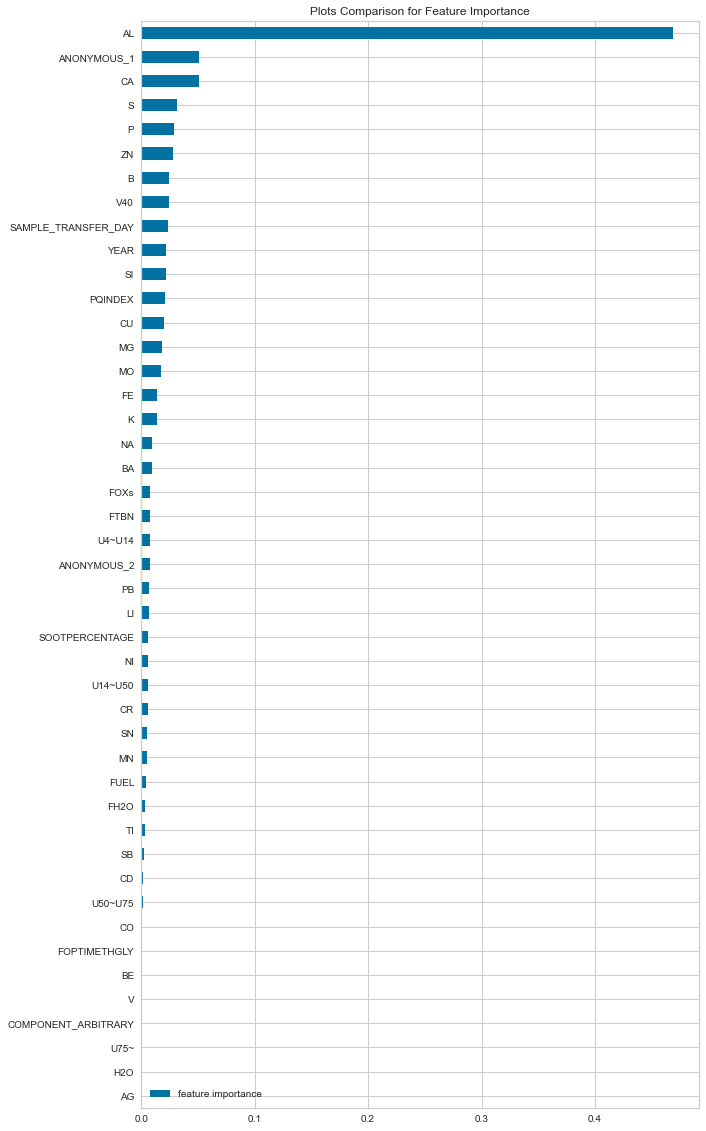

In [130]:
# Decision Tree Feature Importance
fi[::-1].plot(kind='barh', title='Plots Comparison for Feature Importance', figsize=(10,20))
plt.show()

In [131]:
pred = clf_dt.predict(val_X)

print('F1 Score :', f1_score(pred, val_y))
print('Confusion Matrix', '\n', confusion_matrix(pred, val_y))

F1 Score : 0.5652173913043479
Confusion Matrix 
 [[2456   98]
 [ 122  143]]


Decision Tree에서 Feature Importance 결과 상위 20개 칼럼 **AL, ANONYMOUS_1, CA, S, P, ZN, B, V40, SAMPLE_TRANSFER_DAY, YEAR, SI, PQINDEX, CU, MG, MO, FE, K, NA, BA, FOXs**

이외 트리 모델 **LGBM, CatBoost, XGBoost, Random Forest** 각각 **20개 Feature**만 선택하였고 최종적으로 **AL, CA, BA, B, SI, P, S, FH2O, NA, PB, SAMPLE_TRANSFER_DAY, MG, K, FOXs, ANONYMOUS_1, YEAR, FE, ANONYMOUS_2, ZN, V40, PQINDEX, NI, CU, MO, CR**

In [134]:
# 최종 데이터셋
train = train[['AL','CA','BA','B','SI','P','S','FH2O','NA','PB','SAMPLE_TRANSFER_DAY','MG','K','FOXs',
               'ANONYMOUS_1','YEAR','FE','ANONYMOUS_2','ZN','V40','PQINDEX','NI','CU','MO','CR','Y_LABEL']]

## Teacher Model

**Soft Voting Classifier of LGBM, XGBoost, GBC using Pycaret**

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
               
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', ...)
               
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.09078773792371019, loss='deviance',
                           max_depth=9, max_features=0.6375498969038981,
                           max_leaf_nodes=None,
                           min_impurity_decrease=4.280175776427147e-08,
                           min_impurity_split=None, min_samples_leaf=2,
                           min_samples_split=6, min_weight_fraction_leaf=0.0,
                           n_estimators=105, n_iter_no_change=None,
                           presort='deprecated', random_state=42,
                           subsample=0.6162288583048221, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
                           
weights=[0.13, 0.44, 0.9]

In [135]:
clf = setup(data = train,  
            target = 'Y_LABEL',  # 타겟 데이터 설정
            ordinal_features = {'YEAR' : ['2007','2008','2009','2010','2011','2012','2013','2014',
                                          '2015','2016','2017','2018','2019','2020','2021','2022']},  # YEAR 칼럼은 순서형
            numeric_features = ['AL', 'CA', 'BA', 'B', 'SI', 'P', 'S', 'FH2O', 'NA', 'PB','SAMPLE_TRANSFER_DAY', 'MG', 'K', 
                                'FOXs', 'ANONYMOUS_1', 'FE','ANONYMOUS_2', 'ZN', 'V40', 'PQINDEX', 'NI', 'CU', 'MO', 'CR'], 
            use_gpu = True,
            normalize=True, normalize_method = 'robust',  # 수치형 변수는 이상치가 많아 Robust Scaling 적용
            data_split_stratify=True, fold=5,
            session_id = 42)

,Description,Value
0,session_id,42
1,Target,Y_LABEL
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(14095, 26)"
5,Missing Values,False
6,Numeric Features,24
7,Categorical Features,1
8,Ordinal Features,True
9,High Cardinality Features,False


In [136]:
lgbm = create_model('lightgbm', cross_validation = False)
xgb = create_model('xgboost', cross_validation = False)
gbc = create_model('gbc', cross_validation = False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9548,0.8892,0.5208,0.9126,0.6631,0.6409,0.6699


In [137]:
tuned_lgbm = tune_model(lgbm, optimize='F1', n_iter=5, search_library='optuna', choose_better=True)
tuned_xgb = tune_model(xgb, optimize='F1', n_iter=5, search_library='optuna', choose_better=True)
tuned_gbc = tune_model(gbc, optimize='F1', n_iter=5, search_library='optuna', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9509,0.8757,0.5089,0.8600,0.6394,0.6149,0.6393
1,0.9610,0.9048,0.6071,0.9027,0.7260,0.7058,0.7220
2,0.9574,0.8827,0.5655,0.8962,0.6934,0.6718,0.6924
3,0.9473,0.8576,0.4643,0.8478,0.6000,0.5744,0.6043
4,0.9544,0.8696,0.5325,0.8911,0.6667,0.6438,0.6685
Mean,0.9542,0.8781,0.5357,0.8796,0.6651,0.6421,0.6653
Std,0.0048,0.0157,0.0486,0.0216,0.0434,0.0453,0.0409


In [138]:
print(tuned_lgbm, '\n')
print(tuned_xgb, '\n')
print(tuned_gbc)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0) 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, 

In [139]:
blender_specific_s = blend_models(estimator_list = [tuned_lgbm, tuned_xgb, tuned_gbc], 
                                  optimize = 'F1', method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9544,0.9001,0.5148,0.9158,0.6591,0.6367,0.6672
1,0.9620,0.9163,0.5893,0.9429,0.7253,0.7060,0.7286
2,0.9605,0.9057,0.5536,0.9688,0.7045,0.6850,0.7160
3,0.9503,0.8619,0.4583,0.9167,0.6111,0.5877,0.6282
4,0.9549,0.8904,0.5207,0.9167,0.6642,0.6419,0.6715
Mean,0.9564,0.8949,0.5273,0.9321,0.6728,0.6515,0.6823
Std,0.0043,0.0185,0.0436,0.0210,0.0396,0.0412,0.0362


In [140]:
voting = tune_model(blender_specific_s,
                    optimize = 'F1',
                    choose_better = True,
                    n_iter = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9544,0.9001,0.5148,0.9158,0.6591,0.6367,0.6672
1,0.9620,0.9164,0.5893,0.9429,0.7253,0.7060,0.7286
2,0.9605,0.9057,0.5536,0.9688,0.7045,0.6850,0.7160
3,0.9503,0.8620,0.4583,0.9167,0.6111,0.5877,0.6282
4,0.9549,0.8903,0.5207,0.9167,0.6642,0.6419,0.6715
Mean,0.9564,0.8949,0.5273,0.9321,0.6728,0.6515,0.6823
Std,0.0043,0.0185,0.0436,0.0210,0.0396,0.0412,0.0362


In [141]:
final_model_s = finalize_model(voting)

In [143]:
train = predict_model(final_model_s, data=train, raw_score=True)
train.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9988,1.0000,0.9859,1.0000,0.9929,0.9922,0.9923


,AL,CA,BA,B,SI,P,S,FH2O,NA,PB,...,V40,PQINDEX,NI,CU,MO,CR,Y_LABEL,Label,Score_0,Score_1
0,3,3059,0,93,427,1951,21370,13.0,16,0,...,154.0,8504,6,78,1,13,0,0,0.9970,0.0030
1,2,2978,0,19,0,572,1117,13.0,1,2,...,44.0,19,0,31,0,0,0,0,0.9983,0.0017
2,110,17,1,1,0,328,1334,13.0,2,0,...,72.6,17,0,2,0,1,1,1,0.0008,0.9992
3,8,1960,0,3,1,906,21774,13.0,0,1,...,133.3,44,0,1,0,0,0,0,0.8971,0.1029
4,1,71,0,157,2,309,18470,13.0,2,0,...,133.1,217,0,0,0,0,0,0,0.9966,0.0034


## Student Model

In [145]:
real_test = test.copy()  # 실제 제출용 테스트 데이터

In [149]:
# Student Model에 학습 시킬 데이터 구성
train = train[['ANONYMOUS_1','YEAR','FE','ANONYMOUS_2','ZN','V40','PQINDEX','NI','CU','MO','CR','Y_LABEL','Label','Score_0']]
real_test = real_test[['ANONYMOUS_1','YEAR','FE','ANONYMOUS_2','ZN','V40','PQINDEX','NI','CU','MO','CR']]

In [150]:
# Label 기준으로 split
train, test = train_test_split(train, stratify=train.Label, test_size=0.2, random_state=42)

In [151]:
# YEAR 칼럼 LabelEncoding
le = LabelEncoder()
train.YEAR = le.fit_transform(train.YEAR)
test.YEAR = le.transform(test.YEAR)
real_test.YEAR = le.transform(real_test.YEAR)

In [152]:
numeric_feats = []

for col in train.columns:
    if col not in ['YEAR','Score_0','Label','Y_LABEL']:  # 수치형 피처 설정
        numeric_feats.append(col)

# 수치형 변수의 왜도 확인
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
CR,54.256466
FE,21.703254
CU,21.410766
NI,19.906722
ANONYMOUS_1,13.592554
ANONYMOUS_2,8.648382
PQINDEX,7.280462
MO,2.917377
V40,1.133016
ZN,0.220134


In [153]:
skewness = skewness[abs(skewness.Skew) > 0.75]

skewed_features = skewness.index

# log 변환
for col in skewed_features:
    train[col] = np.log1p(train[col])
    test[col] = np.log1p(test[col])
    real_test[col] = np.log1p(real_test[col])

**수치형 변수 중 왜도 값이 큰 변수는 로그 변환 진행**

### Labeling, Metric Function

In [155]:
def labeling(prob, threshold=0.5):
    return 0 if prob > threshold else 1

def competition_metric(pred, org):
    return round(f1_score(pred, org),4), round(f1_score(pred, org, average='macro'),4)

### DownSample Dataset

In [156]:
train0_index_list = []
train0 = train[train.Score_0 >= 0.5].reset_index(drop=True)
train1 = train[train.Score_0 <= 0.5].reset_index(drop=True)

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

# 0.5보다 높은 데이터를 5개로 split
for index, train0_index in kf.split(train0):
    train0_index_list.append(train0_index)

In [157]:
train0.head()

,ANONYMOUS_1,YEAR,FE,ANONYMOUS_2,ZN,V40,PQINDEX,NI,CU,MO,CR,Y_LABEL,Label,Score_0
0,8.505525,4,5.159055,5.303305,29,4.863681,5.204007,0.693147,0.693147,0.693147,1.098612,0,0,0.9858
1,7.783224,8,1.791759,5.303305,583,3.994524,3.135494,0.000000,2.079442,0.000000,0.693147,0,0,0.9629
2,7.273786,1,7.340187,5.303305,89,4.880527,7.789455,2.302585,5.081404,1.098612,2.708050,0,0,0.9601
3,7.216709,10,3.332205,5.303305,1153,4.414010,3.044522,0.000000,1.386294,0.000000,0.000000,0,0,0.9995
4,7.432484,3,1.386294,5.303305,687,3.811097,2.302585,0.000000,2.397895,0.000000,0.000000,0,0,0.9965


In [158]:
train01 = train0[train0.index.isin(train0_index_list[0])]
train02 = train0[train0.index.isin(train0_index_list[1])]
train03 = train0[train0.index.isin(train0_index_list[2])]
train04 = train0[train0.index.isin(train0_index_list[3])]
train05 = train0[train0.index.isin(train0_index_list[4])]

train_df1 = pd.concat([train01, train1], axis=0).reset_index(drop=True)
train_df2 = pd.concat([train02, train1], axis=0).reset_index(drop=True)
train_df3 = pd.concat([train03, train1], axis=0).reset_index(drop=True)
train_df4 = pd.concat([train04, train1], axis=0).reset_index(drop=True)
train_df5 = pd.concat([train05, train1], axis=0).reset_index(drop=True)

X_train1 = train_df1[['ANONYMOUS_1','YEAR','FE','ANONYMOUS_2','ZN','V40','PQINDEX','NI','CU','MO','CR']]
y_train1 = train_df1['Score_0']

X_train2 = train_df2[['ANONYMOUS_1','YEAR','FE','ANONYMOUS_2','ZN','V40','PQINDEX','NI','CU','MO','CR']]
y_train2 = train_df2['Score_0']

X_train3 = train_df3[['ANONYMOUS_1','YEAR','FE','ANONYMOUS_2','ZN','V40','PQINDEX','NI','CU','MO','CR']]
y_train3 = train_df3['Score_0']

X_train4 = train_df4[['ANONYMOUS_1','YEAR','FE','ANONYMOUS_2','ZN','V40','PQINDEX','NI','CU','MO','CR']]
y_train4 = train_df4['Score_0']

X_train5 = train_df5[['ANONYMOUS_1','YEAR','FE','ANONYMOUS_2','ZN','V40','PQINDEX','NI','CU','MO','CR']]
y_train5 = train_df5['Score_0']

X_test = test[['ANONYMOUS_1','YEAR','FE','ANONYMOUS_2','ZN','V40','PQINDEX','NI','CU','MO','CR']]
y_test = test[['Y_LABEL', 'Score_0']]

### Dataset 1

#### Extra Trees

In [159]:
param_et = {'max_depth': 12, 'max_leaf_nodes': 312, 'n_estimators': 222}

clf_et1 = ExtraTreesRegressor(**param_et, random_state=42)

In [160]:
clf_et1.fit(X_train1, y_train1)

pred_test_et = clf_et1.predict(X_test)

y_test['pred_et'] = [labeling(pred, threshold=0.6) for pred in pred_test_et]

print('MAE :', round(mean_absolute_error(pred_test_et, y_test.Score_0),4))
print('F1 Score :', competition_metric(y_test.pred_et, y_test.Y_LABEL)[0])
print('Macro F1 Score :', competition_metric(y_test.pred_et, y_test.Y_LABEL)[1], '\n')
print(confusion_matrix(y_test.pred_et, y_test.Y_LABEL))

MAE : 0.2647
F1 Score : 0.2496
Macro F1 Score : 0.5746 

[[2237  158]
 [ 341   83]]


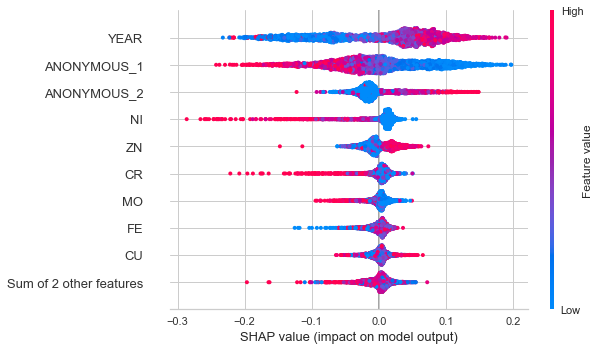

In [161]:
explainer_et = shap.Explainer(clf_et1)
shap_values_et = explainer_et(X_train1)

# SHAP 값 plot
shap.plots.beeswarm(shap_values_et)

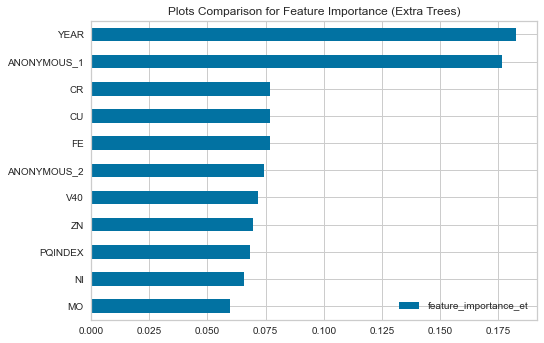

In [162]:
fi_et = pd.DataFrame(clf_et1.feature_importances_, index=X_train1.columns, columns=['feature_importance_et']).sort_values('feature_importance_et', ascending=False)
fi_et[::-1].plot(kind='barh', title='Plots Comparison for Feature Importance (Extra Trees)')
plt.show()

### Dataset 2

#### CatBoost

In [163]:
param_cat = {'l2_leaf_reg': 0.06649448838397229, 'max_bin': 382, 'learning_rate': 0.013386842751462055, 
             'n_estimators': 426, 'max_depth': 8, 'min_data_in_leaf': 79}

clf_cat2 = CatBoostRegressor(**param_cat, random_state=42)

In [164]:
clf_cat2.fit(X_train2, y_train2)

pred_test_cat = clf_cat2.predict(X_test)

y_test['pred_cat'] = [labeling(pred, threshold=0.6) for pred in pred_test_cat]

print('MAE :', round(mean_absolute_error(pred_test_cat, y_test.Score_0),4))
print('F1 Score :', competition_metric(y_test.pred_cat, y_test.Y_LABEL)[0])
print('Macro F1 Score :', competition_metric(y_test.pred_cat, y_test.Y_LABEL)[1], '\n')
print(confusion_matrix(y_test.pred_cat, y_test.Y_LABEL))

0:	learn: 0.4064472	total: 150ms	remaining: 1m 3s
1:	learn: 0.4059786	total: 154ms	remaining: 32.6s
2:	learn: 0.4053698	total: 158ms	remaining: 22.3s
3:	learn: 0.4048524	total: 162ms	remaining: 17.1s
4:	learn: 0.4042996	total: 167ms	remaining: 14.1s
5:	learn: 0.4037732	total: 171ms	remaining: 12s
6:	learn: 0.4031967	total: 176ms	remaining: 10.5s
7:	learn: 0.4026567	total: 180ms	remaining: 9.43s
8:	learn: 0.4021532	total: 185ms	remaining: 8.59s
9:	learn: 0.4016714	total: 190ms	remaining: 7.91s
10:	learn: 0.4011433	total: 195ms	remaining: 7.35s
11:	learn: 0.4006802	total: 200ms	remaining: 6.89s
12:	learn: 0.4001608	total: 204ms	remaining: 6.49s
13:	learn: 0.3997765	total: 209ms	remaining: 6.14s
14:	learn: 0.3993604	total: 213ms	remaining: 5.83s
15:	learn: 0.3988463	total: 217ms	remaining: 5.57s
16:	learn: 0.3984100	total: 222ms	remaining: 5.34s
17:	learn: 0.3979848	total: 226ms	remaining: 5.13s
18:	learn: 0.3975598	total: 230ms	remaining: 4.93s
19:	learn: 0.3971073	total: 235ms	remaining

187:	learn: 0.3576839	total: 1.02s	remaining: 1.29s
188:	learn: 0.3575525	total: 1.03s	remaining: 1.29s
189:	learn: 0.3574022	total: 1.03s	remaining: 1.28s
190:	learn: 0.3573375	total: 1.04s	remaining: 1.28s
191:	learn: 0.3571555	total: 1.04s	remaining: 1.27s
192:	learn: 0.3570352	total: 1.05s	remaining: 1.26s
193:	learn: 0.3567892	total: 1.05s	remaining: 1.26s
194:	learn: 0.3566632	total: 1.06s	remaining: 1.25s
195:	learn: 0.3565338	total: 1.06s	remaining: 1.25s
196:	learn: 0.3564432	total: 1.07s	remaining: 1.24s
197:	learn: 0.3563274	total: 1.07s	remaining: 1.23s
198:	learn: 0.3562107	total: 1.08s	remaining: 1.23s
199:	learn: 0.3560404	total: 1.08s	remaining: 1.22s
200:	learn: 0.3559473	total: 1.08s	remaining: 1.22s
201:	learn: 0.3558282	total: 1.09s	remaining: 1.21s
202:	learn: 0.3557545	total: 1.09s	remaining: 1.2s
203:	learn: 0.3555978	total: 1.1s	remaining: 1.2s
204:	learn: 0.3554120	total: 1.1s	remaining: 1.19s
205:	learn: 0.3552964	total: 1.11s	remaining: 1.18s
206:	learn: 0.35

371:	learn: 0.3369942	total: 1.89s	remaining: 275ms
372:	learn: 0.3368927	total: 1.9s	remaining: 270ms
373:	learn: 0.3367600	total: 1.9s	remaining: 265ms
374:	learn: 0.3366895	total: 1.91s	remaining: 260ms
375:	learn: 0.3366091	total: 1.91s	remaining: 255ms
376:	learn: 0.3364613	total: 1.92s	remaining: 249ms
377:	learn: 0.3363178	total: 1.92s	remaining: 244ms
378:	learn: 0.3362607	total: 1.93s	remaining: 239ms
379:	learn: 0.3360201	total: 1.93s	remaining: 234ms
380:	learn: 0.3359297	total: 1.94s	remaining: 229ms
381:	learn: 0.3358239	total: 1.94s	remaining: 224ms
382:	learn: 0.3357051	total: 1.95s	remaining: 218ms
383:	learn: 0.3356109	total: 1.95s	remaining: 213ms
384:	learn: 0.3355565	total: 1.95s	remaining: 208ms
385:	learn: 0.3354629	total: 1.96s	remaining: 203ms
386:	learn: 0.3353560	total: 1.96s	remaining: 198ms
387:	learn: 0.3353055	total: 1.97s	remaining: 193ms
388:	learn: 0.3352282	total: 1.97s	remaining: 187ms
389:	learn: 0.3351690	total: 1.97s	remaining: 182ms
390:	learn: 0.

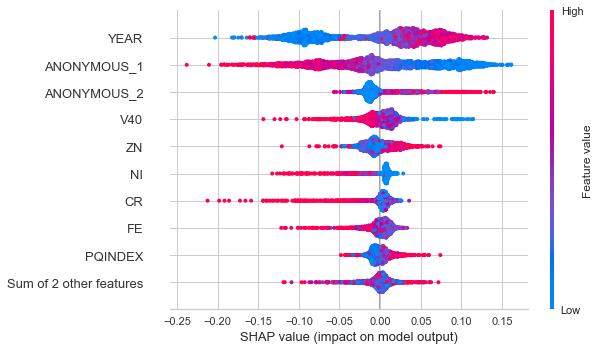

In [165]:
explainer_cat = shap.Explainer(clf_cat2)
shap_values_cat = explainer_cat(X_train2)

# SHAP 값 plot
shap.plots.beeswarm(shap_values_cat)

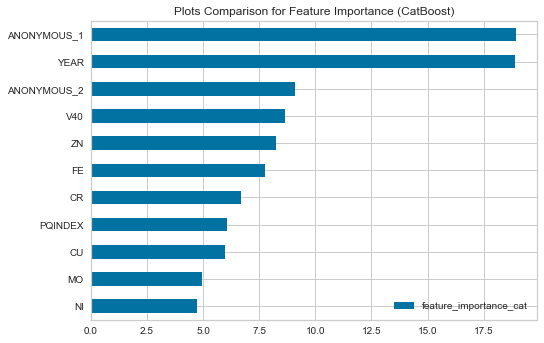

In [166]:
fi_cat = pd.DataFrame(clf_cat2.feature_importances_, index=X_train2.columns, 
                      columns=['feature_importance_cat']).sort_values('feature_importance_cat', ascending=False)
fi_cat[::-1].plot(kind='barh', title='Plots Comparison for Feature Importance (CatBoost)')
plt.show()

### Dataset 3

#### Extra Trees

In [167]:
param_et = {'max_depth': 12, 'max_leaf_nodes': 330, 'n_estimators': 492}

clf_et3 = ExtraTreesRegressor(**param_et, random_state=42)

In [168]:
clf_et3.fit(X_train3, y_train3)

pred_test_et = clf_et3.predict(X_test)

y_test['pred_et'] = [labeling(pred, threshold=0.6) for pred in pred_test_et]

print('MAE :', round(mean_absolute_error(pred_test_et, y_test.Score_0),4))
print('F1 Score :', competition_metric(y_test.pred_et, y_test.Y_LABEL)[0])
print('Macro F1 Score :', competition_metric(y_test.pred_et, y_test.Y_LABEL)[1], '\n')
print(confusion_matrix(y_test.pred_et, y_test.Y_LABEL))

MAE : 0.2625
F1 Score : 0.248
Macro F1 Score : 0.5775 

[[2275  164]
 [ 303   77]]


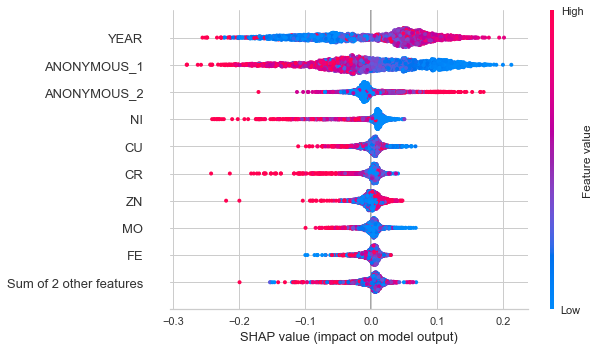

In [169]:
explainer_et = shap.Explainer(clf_et3)
shap_values_et = explainer_et(X_train3)

# SHAP 값 plot
shap.plots.beeswarm(shap_values_et)

In [170]:
fi_et = pd.DataFrame(clf_et3.feature_importances_, index=X_train3.columns, columns=['feature_importance_et']).sort_values('feature_importance_et', ascending=False)
fi_et

,feature_importance_et
ANONYMOUS_1,0.192230
YEAR,0.176645
CU,0.080941
CR,0.073063
FE,0.072343
PQINDEX,0.071773
ZN,0.069955
ANONYMOUS_2,0.068505
V40,0.068445
MO,0.064943


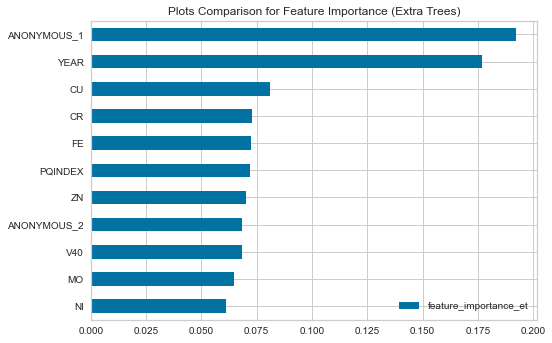

In [171]:
fi_et[::-1].plot(kind='barh', title='Plots Comparison for Feature Importance (Extra Trees)')
plt.show()

### Dataset 4

#### CatBoost

In [173]:
param_cat = {'l2_leaf_reg': 0.6830597290675959, 'max_bin': 352, 'learning_rate': 0.011084218165963517, 
             'n_estimators': 367, 'max_depth': 7, 'min_data_in_leaf': 165}

clf_cat4 = CatBoostRegressor(**param_cat, random_state=42)

In [174]:
clf_cat4.fit(X_train4, y_train4)

pred_test_cat = clf_cat4.predict(X_test)

y_test['pred_cat'] = [labeling(pred, threshold=0.6) for pred in pred_test_cat]

print('MAE :', round(mean_absolute_error(pred_test_cat, y_test.Score_0),4))
print('F1 Score :', competition_metric(y_test.pred_cat, y_test.Y_LABEL)[0])
print('Macro F1 Score :', competition_metric(y_test.pred_cat, y_test.Y_LABEL)[1], '\n')
print(confusion_matrix(y_test.pred_cat, y_test.Y_LABEL))

0:	learn: 0.4063360	total: 2.67ms	remaining: 977ms
1:	learn: 0.4059194	total: 5.26ms	remaining: 960ms
2:	learn: 0.4055096	total: 7.58ms	remaining: 919ms
3:	learn: 0.4050783	total: 10.4ms	remaining: 942ms
4:	learn: 0.4046439	total: 12.8ms	remaining: 928ms
5:	learn: 0.4042839	total: 15.2ms	remaining: 912ms
6:	learn: 0.4038887	total: 17.7ms	remaining: 910ms
7:	learn: 0.4035225	total: 20.1ms	remaining: 903ms
8:	learn: 0.4031268	total: 22.7ms	remaining: 901ms
9:	learn: 0.4026834	total: 25ms	remaining: 894ms
10:	learn: 0.4023063	total: 27.6ms	remaining: 893ms
11:	learn: 0.4019272	total: 30.7ms	remaining: 908ms
12:	learn: 0.4015565	total: 33.1ms	remaining: 902ms
13:	learn: 0.4011596	total: 36.2ms	remaining: 913ms
14:	learn: 0.4008133	total: 38.6ms	remaining: 907ms
15:	learn: 0.4004802	total: 41.1ms	remaining: 903ms
16:	learn: 0.4001511	total: 43.4ms	remaining: 894ms
17:	learn: 0.3998300	total: 45.6ms	remaining: 885ms
18:	learn: 0.3994955	total: 48ms	remaining: 880ms
19:	learn: 0.3991366	total

200:	learn: 0.3700749	total: 497ms	remaining: 411ms
201:	learn: 0.3699930	total: 500ms	remaining: 409ms
202:	learn: 0.3698963	total: 504ms	remaining: 407ms
203:	learn: 0.3698343	total: 507ms	remaining: 405ms
204:	learn: 0.3697592	total: 510ms	remaining: 403ms
205:	learn: 0.3696933	total: 513ms	remaining: 401ms
206:	learn: 0.3695871	total: 516ms	remaining: 398ms
207:	learn: 0.3694870	total: 518ms	remaining: 396ms
208:	learn: 0.3694121	total: 521ms	remaining: 394ms
209:	learn: 0.3692799	total: 523ms	remaining: 391ms
210:	learn: 0.3691477	total: 526ms	remaining: 389ms
211:	learn: 0.3690670	total: 529ms	remaining: 387ms
212:	learn: 0.3689623	total: 532ms	remaining: 384ms
213:	learn: 0.3688758	total: 534ms	remaining: 382ms
214:	learn: 0.3687866	total: 537ms	remaining: 379ms
215:	learn: 0.3687280	total: 539ms	remaining: 377ms
216:	learn: 0.3686249	total: 542ms	remaining: 374ms
217:	learn: 0.3685011	total: 545ms	remaining: 372ms
218:	learn: 0.3683989	total: 547ms	remaining: 370ms
219:	learn: 

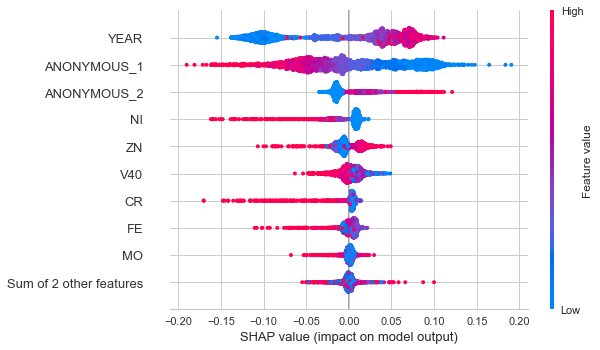

In [175]:
explainer_cat = shap.Explainer(clf_cat4)
shap_values_cat = explainer_cat(X_train4)

# SHAP 값 plot
shap.plots.beeswarm(shap_values_cat)

In [176]:
fi_cat = pd.DataFrame(clf_cat4.feature_importances_, index=X_train4.columns, columns=['feature_importance_cat']).sort_values('feature_importance_cat', ascending=False)
fi_cat

,feature_importance_cat
YEAR,24.675397
ANONYMOUS_1,21.132172
ANONYMOUS_2,8.542969
ZN,7.397533
V40,7.152033
FE,6.427926
NI,6.121575
CR,5.544808
CU,4.575131
PQINDEX,4.342876


In [177]:
fi_cat['feature_importance_cat'] = fi_cat['feature_importance_cat'] / fi_cat['feature_importance_cat'].sum()
fi_cat

,feature_importance_cat
YEAR,0.246754
ANONYMOUS_1,0.211322
ANONYMOUS_2,0.085430
ZN,0.073975
V40,0.071520
FE,0.064279
NI,0.061216
CR,0.055448
CU,0.045751
PQINDEX,0.043429


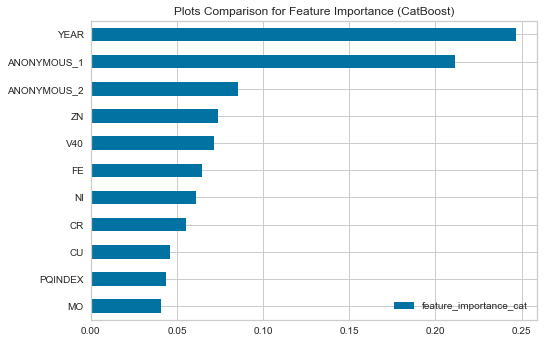

In [178]:
fi_cat[::-1].plot(kind='barh', title='Plots Comparison for Feature Importance (CatBoost)')
plt.show()

### Dataset 5

#### Extra Trees

In [179]:
param_et = {'max_depth': 12, 'max_leaf_nodes': 192, 'n_estimators': 50}

clf_et5 = ExtraTreesRegressor(**param_et, random_state=42)

In [180]:
clf_et5.fit(X_train5, y_train5)

pred_test_et = clf_et5.predict(X_test)

y_test['pred_et'] = [labeling(pred, threshold=0.6) for pred in pred_test_et]

print('MAE :', round(mean_absolute_error(pred_test_et, y_test.Score_0),4))
print('F1 Score :', competition_metric(y_test.pred_et, y_test.Y_LABEL)[0])
print('Macro F1 Score :', competition_metric(y_test.pred_et, y_test.Y_LABEL)[1], '\n')
print(confusion_matrix(y_test.pred_et, y_test.Y_LABEL))

MAE : 0.2643
F1 Score : 0.2524
Macro F1 Score : 0.5788 

[[2265  161]
 [ 313   80]]


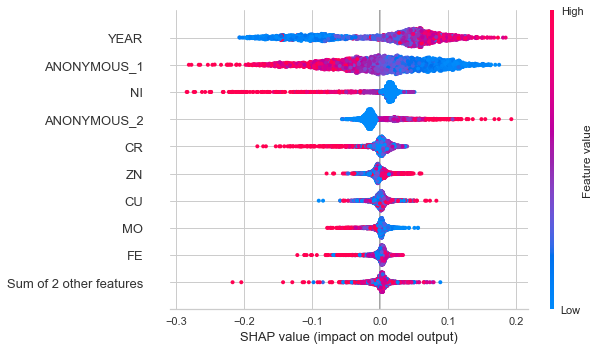

In [181]:
explainer_et = shap.Explainer(clf_et5)
shap_values_et = explainer_et(X_train5)

# SHAP 값 plot
shap.plots.beeswarm(shap_values_et)

In [182]:
fi_et = pd.DataFrame(clf_et5.feature_importances_, index=X_train5.columns, columns=['feature_importance_et']).sort_values('feature_importance_et', ascending=False)
fi_et

,feature_importance_et
YEAR,0.203783
ANONYMOUS_1,0.199052
NI,0.080513
CR,0.078100
ANONYMOUS_2,0.070532
CU,0.070493
FE,0.064836
V40,0.064469
ZN,0.057908
PQINDEX,0.056018


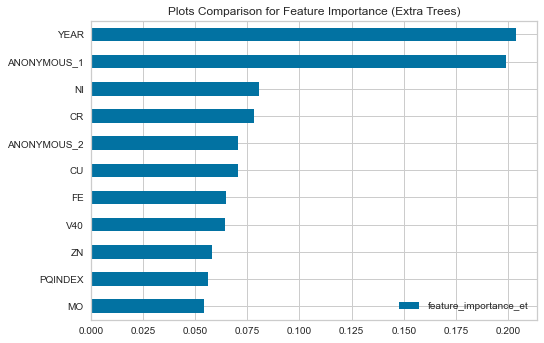

In [183]:
fi_et[::-1].plot(kind='barh', title='Plots Comparison for Feature Importance (Extra Trees)')
plt.show()

### Stacking

- **Dataset 1**
> **Extra Trees** <br>
Hyperparameter : {'max_depth': 12, 'max_leaf_nodes': 312, 'n_estimators': 222}

- **Dataset 2**
> **CatBoost** <br>
Hyperparameter : {'l2_leaf_reg': 0.06649448838397229, 'max_bin': 382, 'learning_rate': 0.013386842751462055, 'n_estimators': 426, 'max_depth': 8, 'min_data_in_leaf': 79}

- **Dataset 3**
> **Extra Trees** <br>
Hyperparameter : {'max_depth': 12, 'max_leaf_nodes': 330, 'n_estimators': 492}

- **Dataset 4**
> **CatBoost** <br>
Hyperparameter : {'l2_leaf_reg': 0.6830597290675959, 'max_bin': 352, 'learning_rate': 0.011084218165963517, 'n_estimators': 367, 'max_depth': 7, 'min_data_in_leaf': 165}

- **Dataset 5**
> **Extra Trees** <br>
Hyperparameter : {'max_depth': 12, 'max_leaf_nodes': 192, 'n_estimators': 50}

#### Mean 

In [184]:
pred_test_et1 = clf_et1.predict(X_test)
pred_test_cat2 = clf_cat2.predict(X_test)
pred_test_et3 = clf_et3.predict(X_test)
pred_test_cat4 = clf_cat4.predict(X_test)
pred_test_et5 = clf_et5.predict(X_test)

pred_test_stack = 0.2*pred_test_et1 + 0.2*pred_test_cat2 + 0.2*pred_test_et3 + 0.2*pred_test_cat4 + 0.2*pred_test_et5

y_test['pred_mean'] = [labeling(pred, threshold=0.6) for pred in pred_test_stack]

print('MAE :', round(mean_absolute_error(pred_test_stack, y_test.Score_0),4))
print('F1 Score :', competition_metric(y_test.pred_mean, y_test.Y_LABEL)[0])
print('Macro F1 Score :', competition_metric(y_test.pred_mean, y_test.Y_LABEL)[1], '\n')
print(confusion_matrix(y_test.pred_mean, y_test.Y_LABEL))

MAE : 0.2645
F1 Score : 0.2556
Macro F1 Score : 0.5852 

[[2314  167]
 [ 264   74]]


## Submission

In [185]:
# Prediction
pred_test_real_et1 = clf_et1.predict(real_test)
pred_test_real_cat2 = clf_cat2.predict(real_test)
pred_test_real_et3 = clf_et3.predict(real_test)
pred_test_real_cat4 = clf_cat4.predict(real_test)
pred_test_real_et5 = clf_et5.predict(real_test)

# Stacking Mean
pred_test_real = 0.2*pred_test_real_et1 + 0.2*pred_test_real_cat2 + 0.2*pred_test_real_et3 + 0.2*pred_test_real_cat4 + 0.2*pred_test_real_et5

pred_test_real = [labeling(pred, threshold=0.6) for pred in pred_test_real]

In [187]:
submit = pd.read_csv('C:/Users/cdbre/OneDrive/바탕 화면/데이콘용/sample_submission.csv')
submit['Y_LABEL'] = pred_test_real
submit.head()

,ID,Y_LABEL
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,1


In [190]:
# 최종 제출
submit.to_csv('C:/Users/cdbre/OneDrive/바탕 화면/데이콘용/submission_T1.csv', index=False)